<a href="https://colab.research.google.com/github/deepakr82/AIML-Caps-Prj-Grp6-I-NLP/blob/master/NLP_Capstone_IT_Ticket_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Online Capstone - AUTOMATIC TICKET ASSIGNMENT

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Load data and Pre-processing


In [2]:
import pandas as pd 
import numpy as np
import sys

In [3]:
# Read the .csv file
Ticket = pd.read_excel('/content/drive/My Drive/AIML/NLP/input_data.xlsx',encoding=sys.getfilesystemencoding())

In [4]:
Ticket.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [5]:
# Get the shape and size of the dataset
print('No of rows:\033[1m', Ticket.shape[0], '\033[0m')
print('No of cols:\033[1m', Ticket.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [6]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [7]:
# Describe the dataset with various summary and statistics
Ticket.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [8]:
# Find out the null value counts in each column
Ticket.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

Observations:
1. The dataset comprises of **8500 rows** and **4 columns**.
2. All columns are of type object containing textual information.
3. There are **8 null/missing values** present in the Short description and **1 null/missing values** present in the description column
4. **Password reset** is one of the most occuring tickets which reflects in the Short description column.

In [9]:
# Let's look at the rows with null values
Ticket[pd.isnull(Ticket).any(axis=1)]

Short description  ... Assignment group
2604                       NaN  ...           GRP_34
3383                       NaN  ...            GRP_0
3906                       NaN  ...            GRP_0
3910                       NaN  ...            GRP_0
3915                       NaN  ...            GRP_0
3921                       NaN  ...            GRP_0
3924                       NaN  ...            GRP_0
4341                       NaN  ...            GRP_0
4395  i am locked out of skype  ...            GRP_0

[9 rows x 4 columns]

In [10]:
#Check for Null and drop null rows - Since null count is less
Ticket.isnull().sum()
Ticket.dropna(inplace=True)
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8491 non-null   object
 1   Description        8491 non-null   object
 2   Caller             8491 non-null   object
 3   Assignment group   8491 non-null   object
dtypes: object(4)
memory usage: 331.7+ KB


In [11]:
callers = Ticket['Caller'].unique()
Ticket.drop(columns='Caller',inplace=True)
Ticket.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 3 columns]

In [12]:
Ticket.describe()

Short description Description Assignment group
count               8491        8491             8491
unique              7480        7812               74
top       password reset         the            GRP_0
freq                  38          56             3968

In [13]:
TargetClass = Ticket['Assignment group'].value_counts()
TargetClass.describe()

count      74.000000
mean      114.743243
std       464.840614
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3968.000000
Name: Assignment group, dtype: float64

Observations:
1. There are 74 Groups in all. The Target class distribution is extremely skewed.
2. GRP_0 has the most number of assignments (3968) accounting for ~50% of the data.
3. There are some groups with 1 ticket assignment as well.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


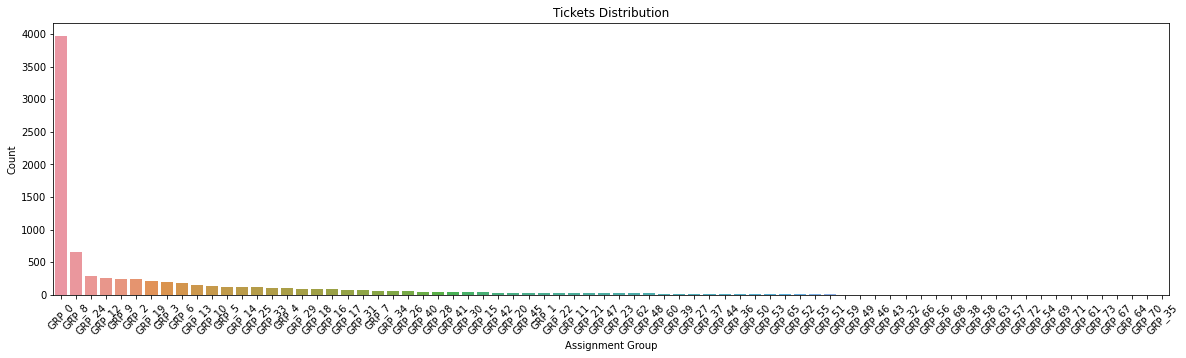

In [14]:
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=Ticket,order = Ticket['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.title('Tickets Distribution')

plt.show()

Merge groups with small entries to a group to reduce the imbalance in the target class.

In [15]:
# Group the tickets count < 100 as GRP_A
Ticket1 = pd.DataFrame(Ticket['Assignment group'].value_counts())
Ticket1 = Ticket1.T
Ticket1

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_67  GRP_64  GRP_70  GRP_35
Assignment group   3968    661     289     257  ...       1       1       1       1

[1 rows x 74 columns]

In [16]:
Ticket['Count'] = Ticket.apply(lambda row: Ticket1[row['Assignment group']] , axis=1)
Ticket.loc[Ticket['Count'] <= 100 , "Assignment group"] = "GRP_A"

In [17]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=Ticket,order = Ticket['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.title('Tickets Distribution - With GRP_A')

plt.show()

Merge "Short description"and "Description" column

In [18]:
Ticket['Description'] = Ticket['Short description'] + ' '+ Ticket['Description']
Ticket.drop(columns=['Short description','Count'],inplace=True)
Ticket.head()

Description Assignment group
0  login issue -verified user details.(employee# ...            GRP_0
1  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...            GRP_0
2  cant log in to vpn \r\n\r\nreceived from: eylq...            GRP_0
3  unable to access hr_tool page unable to access...            GRP_0
4                          skype error  skype error             GRP_0

# Data Cleansing

Text preprocessing is the process of transferring text from human language to machine-readable format for further processing. After a text is obtained, we start with text normalization. 

Text normalization includes:
*   Converting all letters to lower or upper case
*   Converting numbers into words or removing numbers
*   Removing punctuations, accent marks and other diacritics
*   Removing white spaces
*   Removing stop words, sparse terms, and particular words





In [19]:
import string

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

In [20]:
# Define a function to clean the data
import re
from dateutil import parser
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False
        
def clean_data(text):
    text = text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [21]:
# Apply the cleaning function to entire dataset
Ticket['Description'] = Ticket['Description'].apply(clean_data)

# Verify the data
Ticket.head()

Description Assignment group
0  login issue verified user details employee and...            GRP_0
1  outlook hello team my meetings skype meetings ...            GRP_0
2    cant log in to vpn hi cannot log on to vpn best            GRP_0
3  unable to access hr tool page unable to access...            GRP_0
4                            skype error skype error            GRP_0

Comments:

Entire dataset is converted into lower case

*   Users email addresses will add NO value to our analysis, despite the fact that user id is given in the caller column. So all email adresses are removed from the dataset
*   All numerals are removed because they were dominating the dataset if we were converting them into their word representation otherwise.
*   All punctuation marks are removed which used to be a hindrance in lemmatization.
*   All occurances of more than one blank spaces, horizontal tab spaces, new line breaks etc. have been replaced with single blank space.

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. In grammar, inflection is known as the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood. An inflection expresses one or more grammatical categories with a prefix, suffix or infix, or another internal modification such as a vowel change.

**Stemming**
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

**Lemmatization**
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization, root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.


Lemmatisation and stop words removal

In [22]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

Ticket['Description'] = Ticket['Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [23]:
#Verify the data
Ticket.head()

Description Assignment group
0  login issue verify user detail employee and ma...            GRP_0
1  outlook hello team meeting skype meeting etc b...            GRP_0
2  can not log in to vpn hi can not log on to vpn...            GRP_0
3  unable to access hr tool page unable to access...            GRP_0
4                            skype error skype error            GRP_0

In [24]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
# Extend the English Stop Wordss
STOP_WORDS = STOPWORDS.union({'yes','na','hi', 'etc'
                              'receive','hello',
                              'regards','thanks',
                              'from','greeting',
                              'forward','reply',
                              'will','please',
                              'see','help','able'})

# Generic function to derive top N n-grams from the corpus
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range=ngram_range, 
                          stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

**Top Unigrams**

In [25]:
# Top Unigrams after removing stop words
top_n = 50
ngram_range = (1,1)
uni_grams_sw = get_top_n_ngrams(Ticket.Description, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(uni_grams_sw, columns = ['Summary' , 'count'])
figure = df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Summary
job          5096
password     2567
erp          2096
scheduler    1928
tool         1851
fail         1809
user         1677
company      1571
sid          1552
reset        1548
Name: count, dtype: int64

In [26]:
# Top Bigrams after removing stop words
top_n = 50
ngram_range = (2,2)
bi_grams_sw = get_top_n_ngrams(Ticket.Description, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(bi_grams_sw, columns = ['Summary' , 'count'])
figure = df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Summary
job scheduler     1928
fail job          1614
job job           1265
scheduler job      961
job fail           957
password reset     801
erp sid            583
account lock       465
reset password     447
backup circuit     441
Name: count, dtype: int64

In [27]:
# Top Trigrams after removing stop words
top_n = 50
ngram_range = (3,3)
tri_grams_sw = get_top_n_ngrams(Ticket.Description, top_n, ngram_range, stopwords=STOP_WORDS)

df = pd.DataFrame(tri_grams_sw, columns = ['Summary' , 'count'])
figure = df.groupby('Summary').sum()['count'].sort_values(ascending=False)
figure.head(10)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Summary
fail job scheduler          1614
job scheduler job            961
job fail job                 946
job job fail                 945
scheduler job job            464
password management tool     311
job job scheduler            300
erp sid account              213
management tool password     212
access group acl             185
Name: count, dtype: int64

## **Word Cloud**
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, often also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Let's write a generic method to generate Word Clouds

In [28]:
from wordcloud import WordCloud
def generate_word_clod(corpus,x):
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    stopwords=STOP_WORDS,
                    min_font_size = 10).generate(corpus)

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off")
    plt.title("Most common words of {}".format(x)) 
    plt.tight_layout(pad = 0) 
    plt.show()


In [30]:
value = Ticket['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_A', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2',
       'GRP_19', 'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14',
       'GRP_25', 'GRP_33'],
      dtype='object')

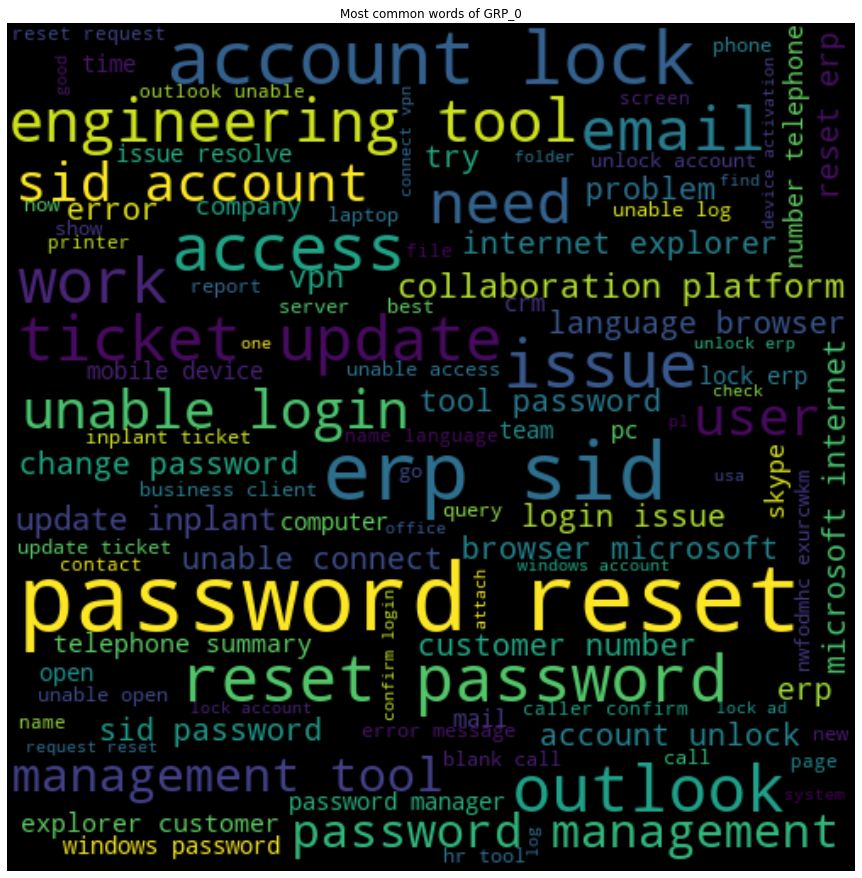

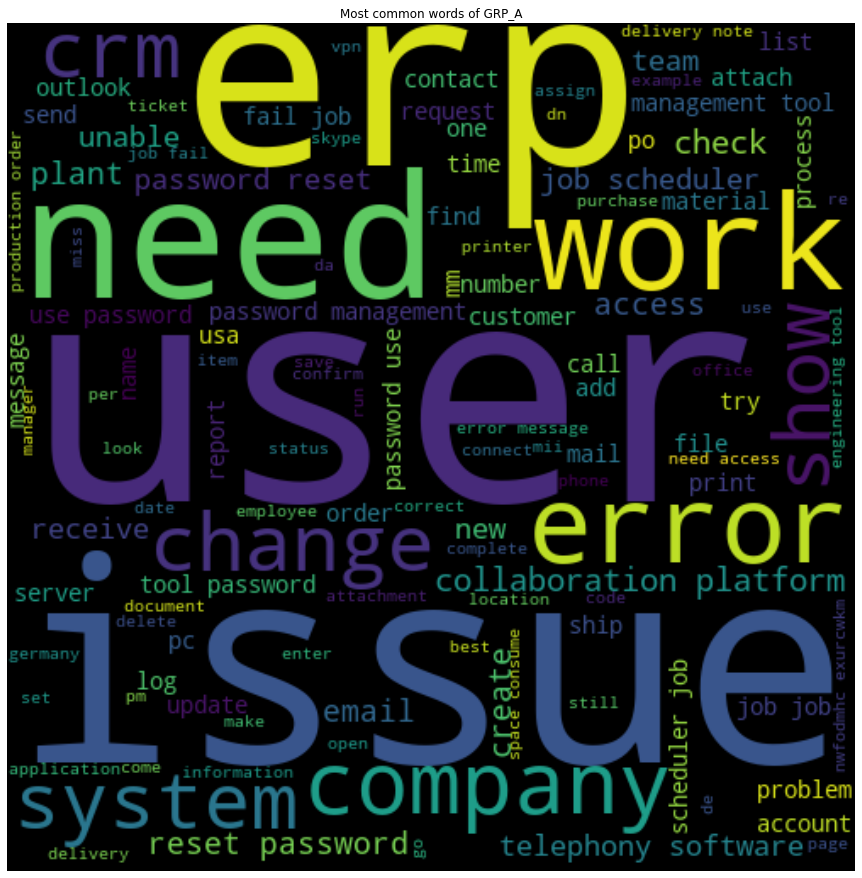

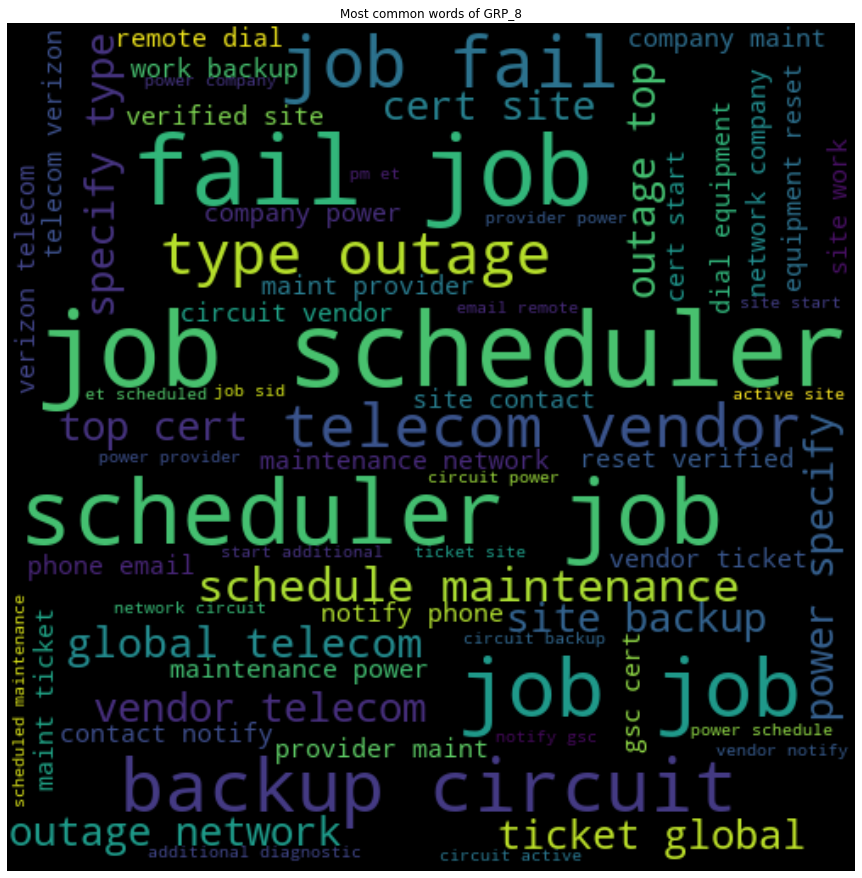

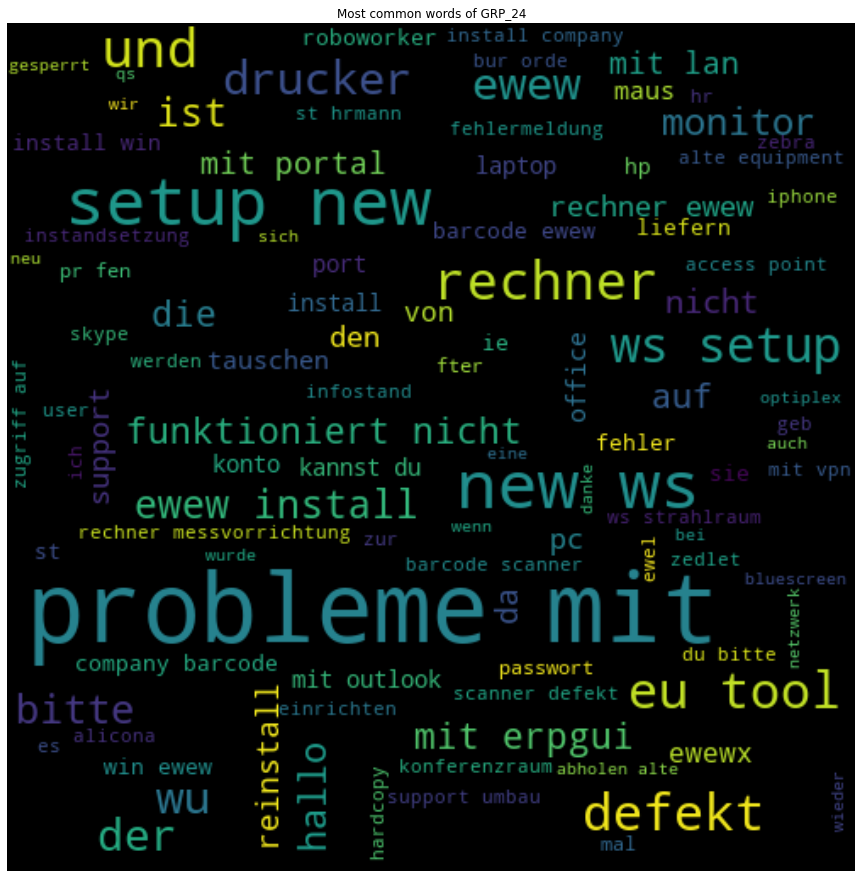

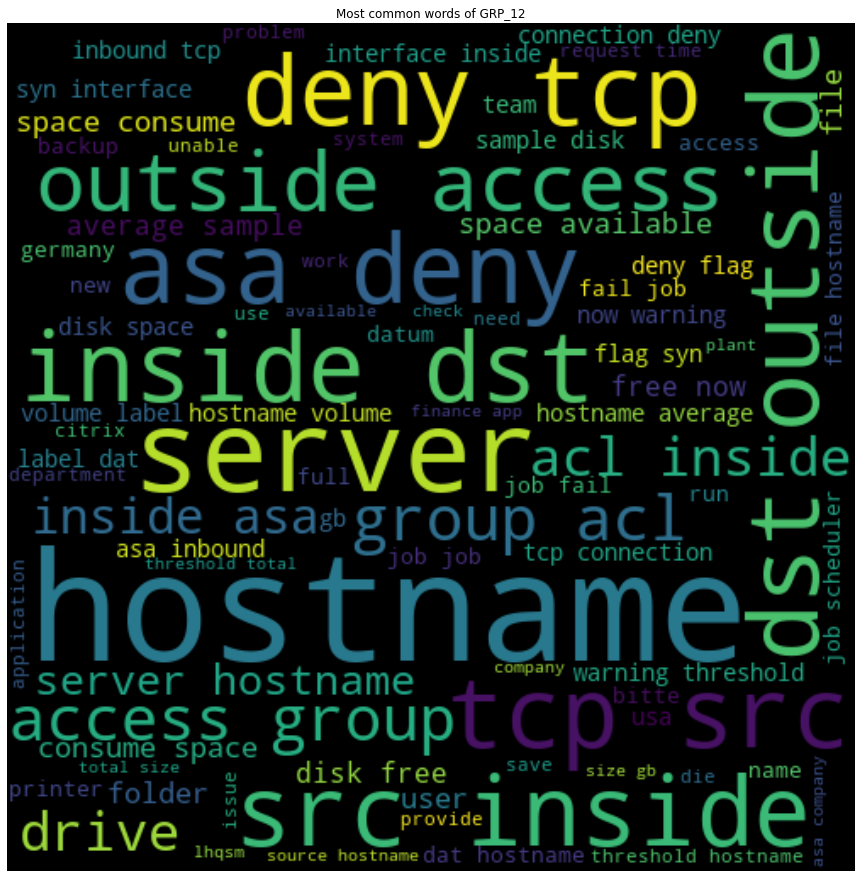

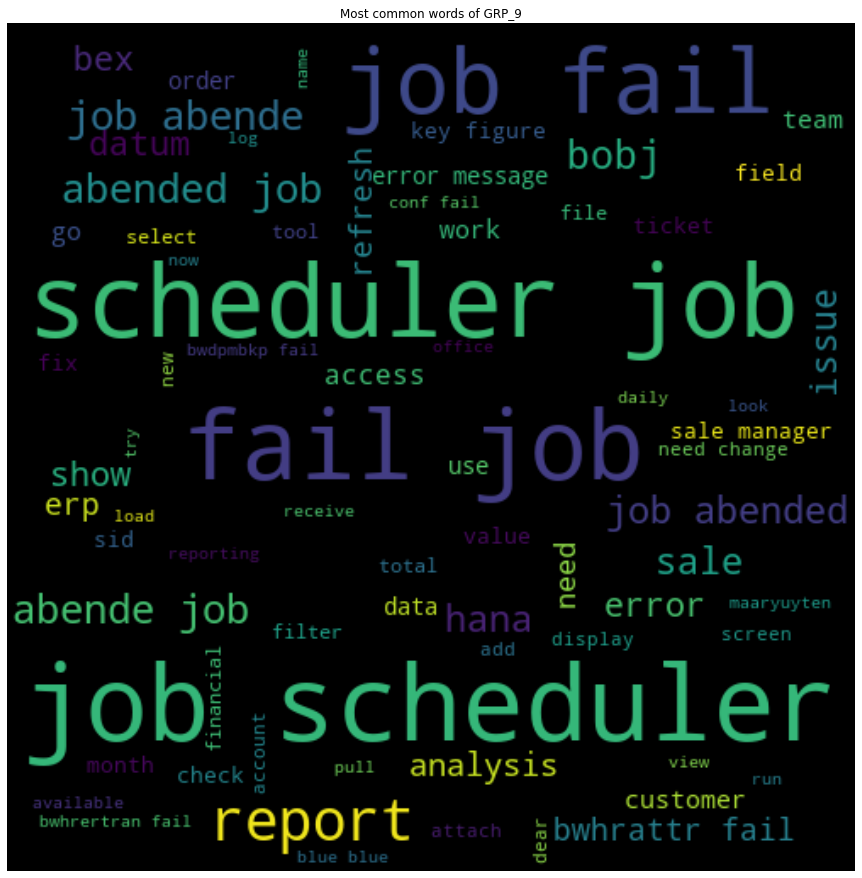

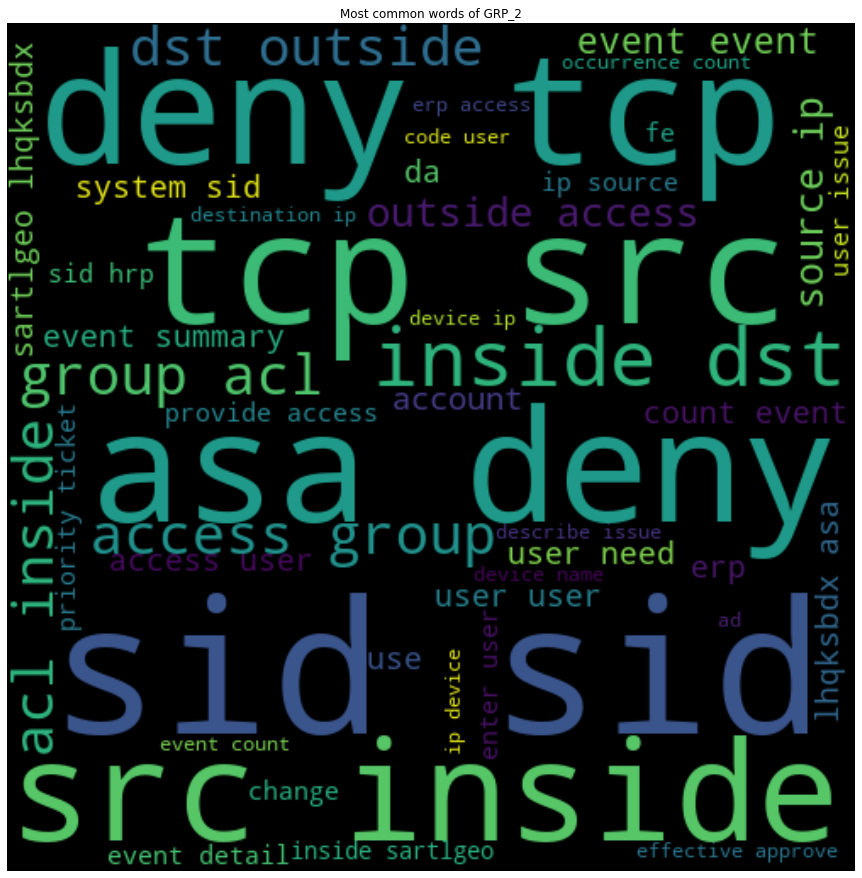

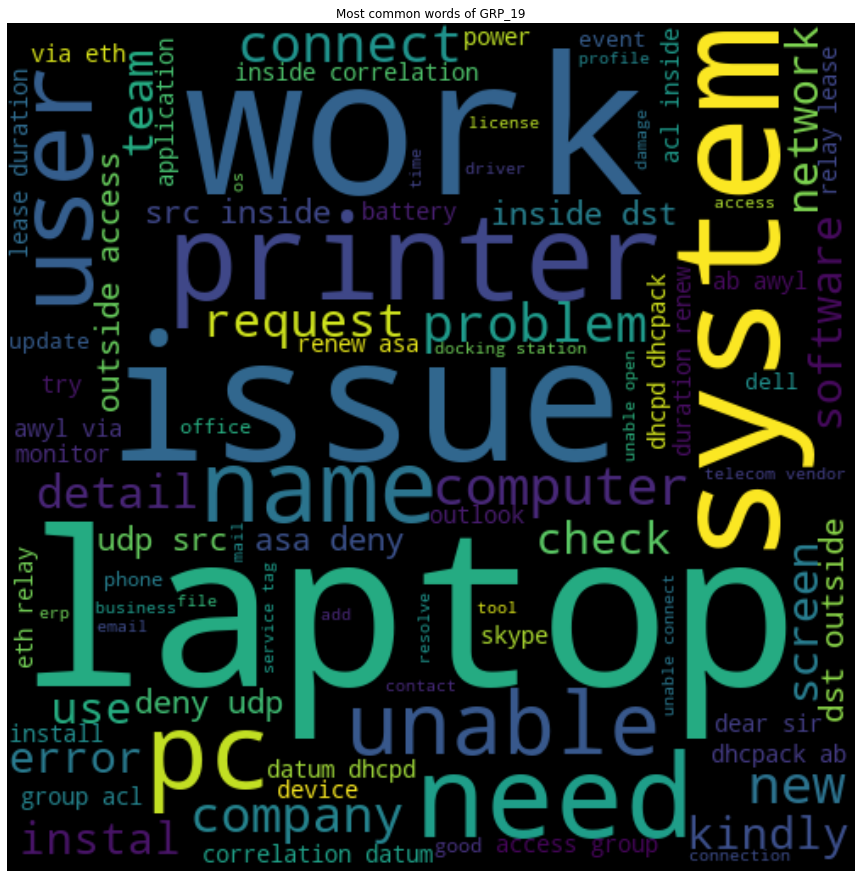

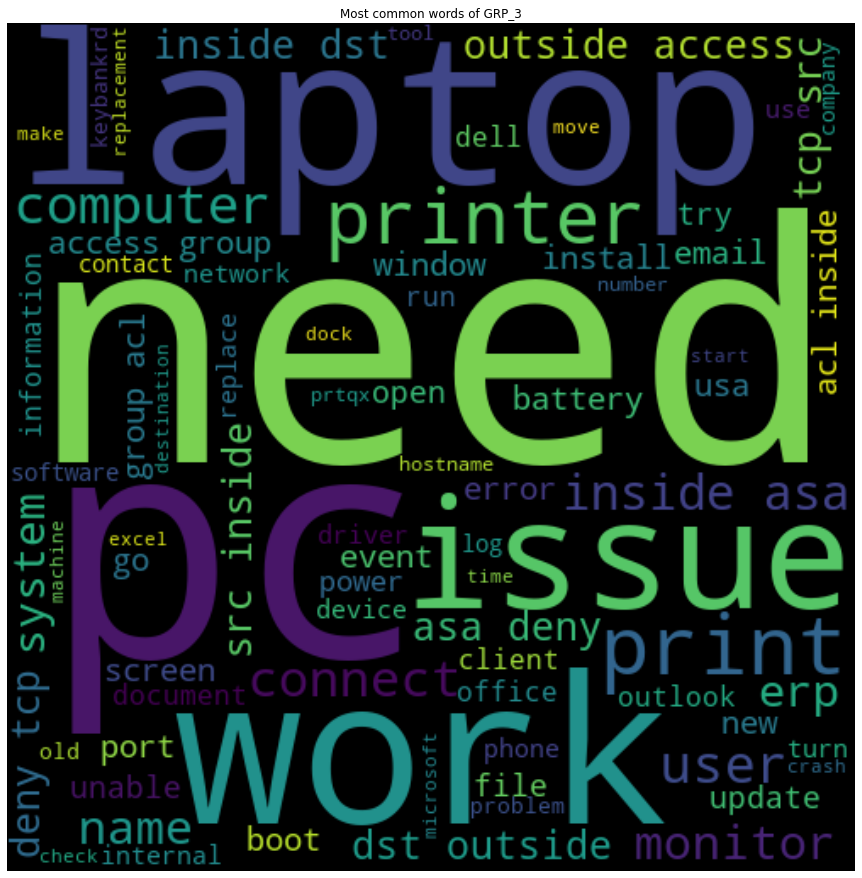

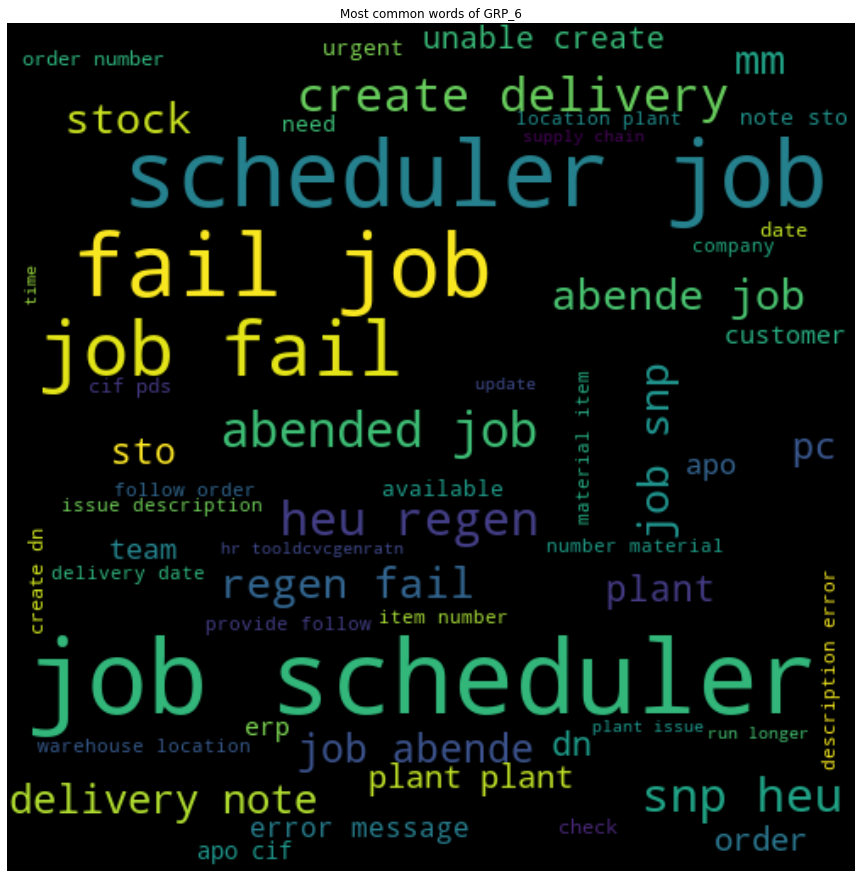

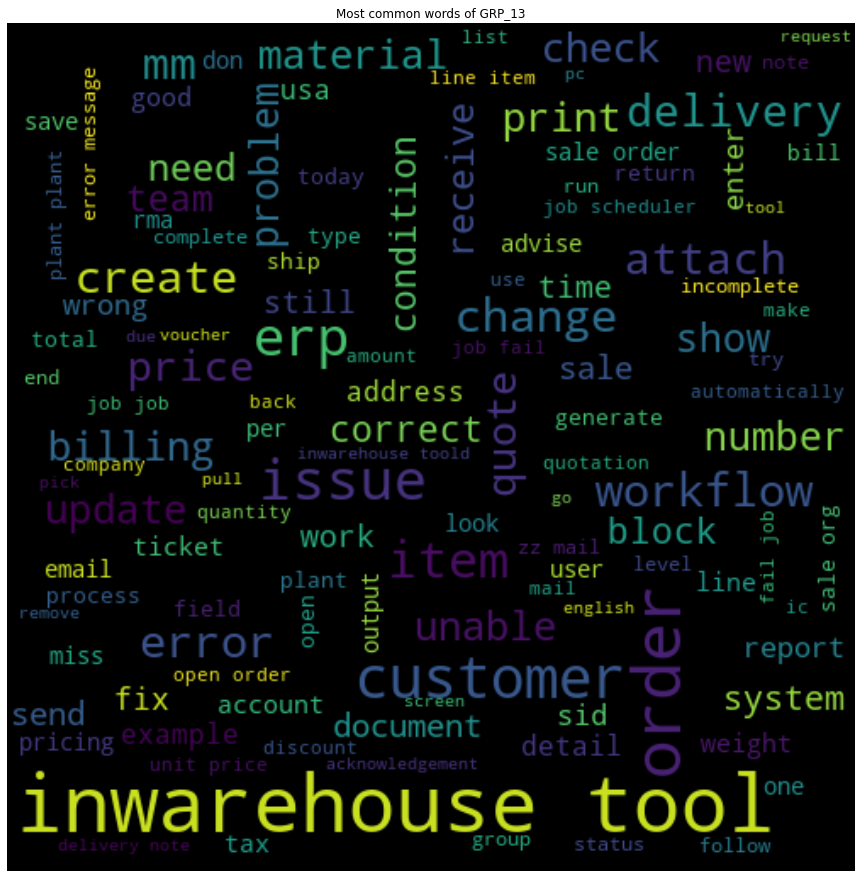

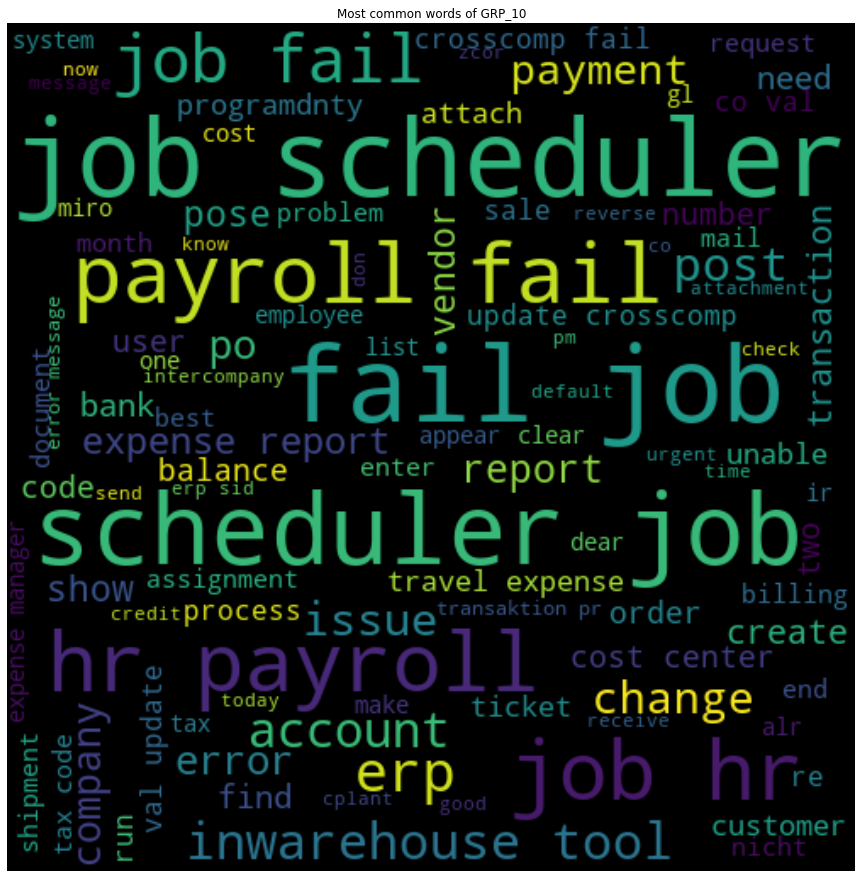

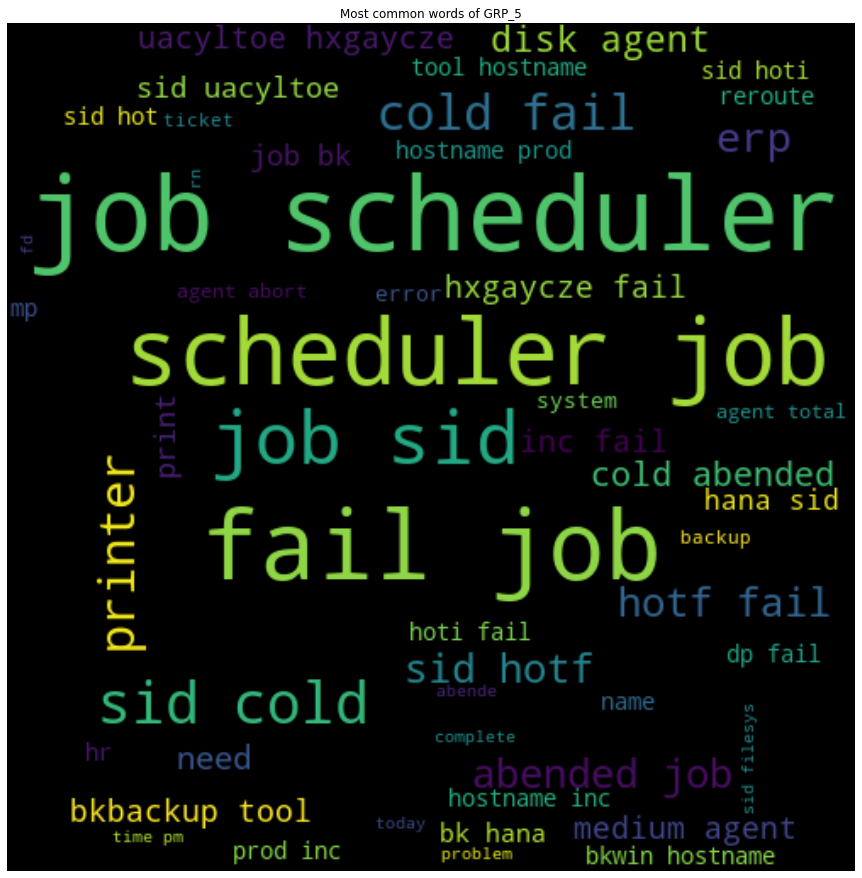

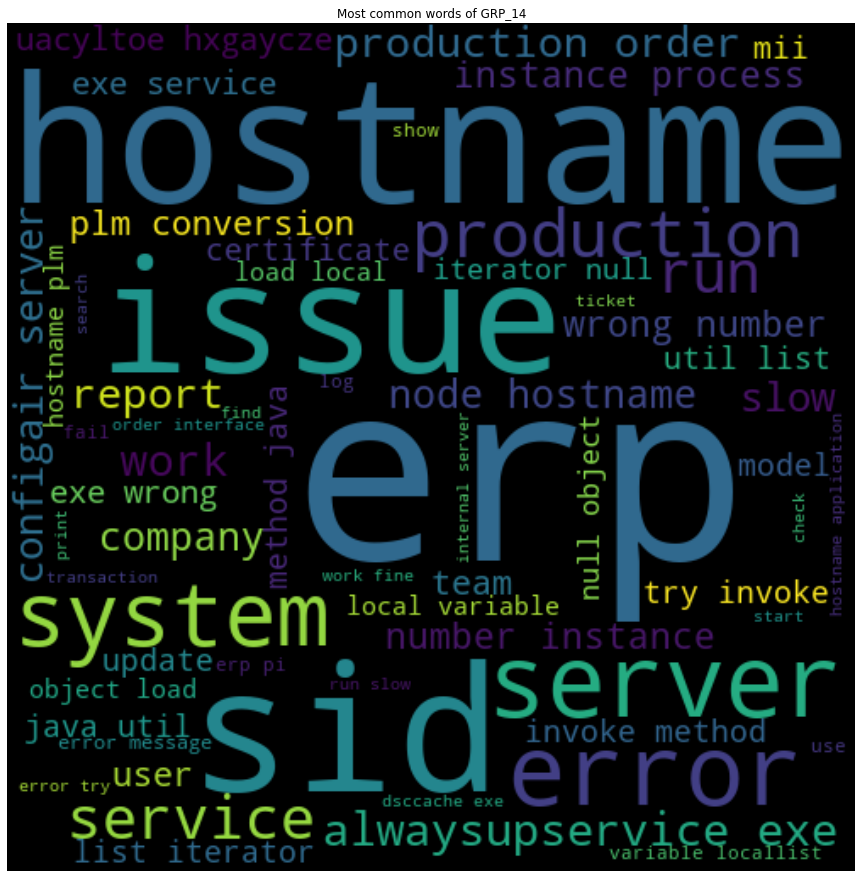

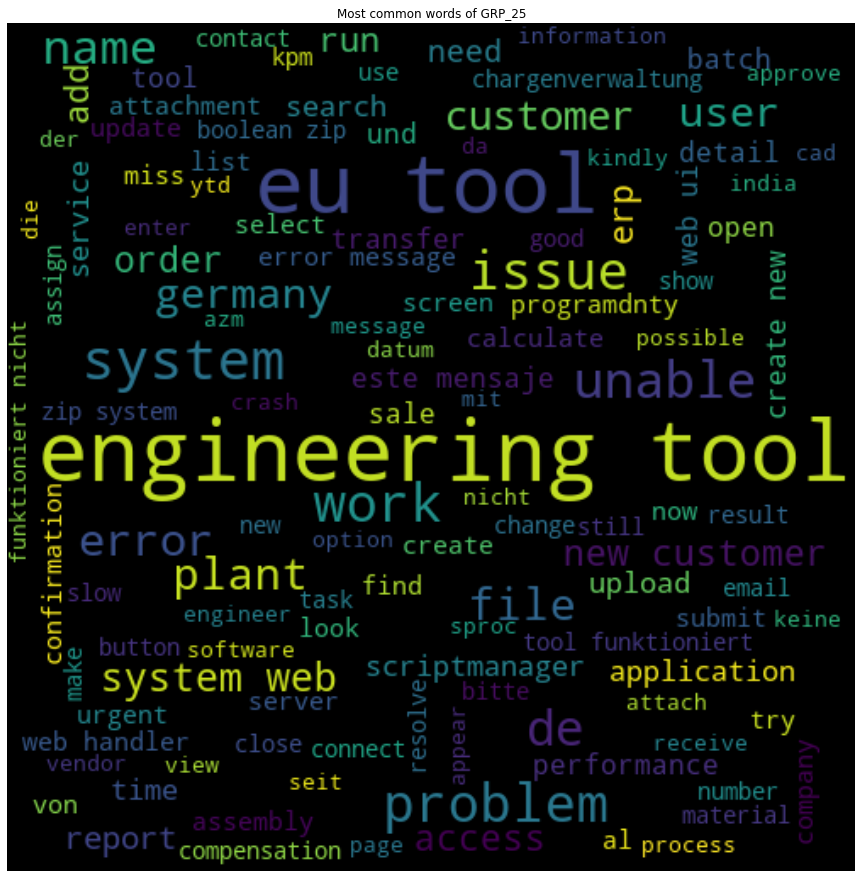

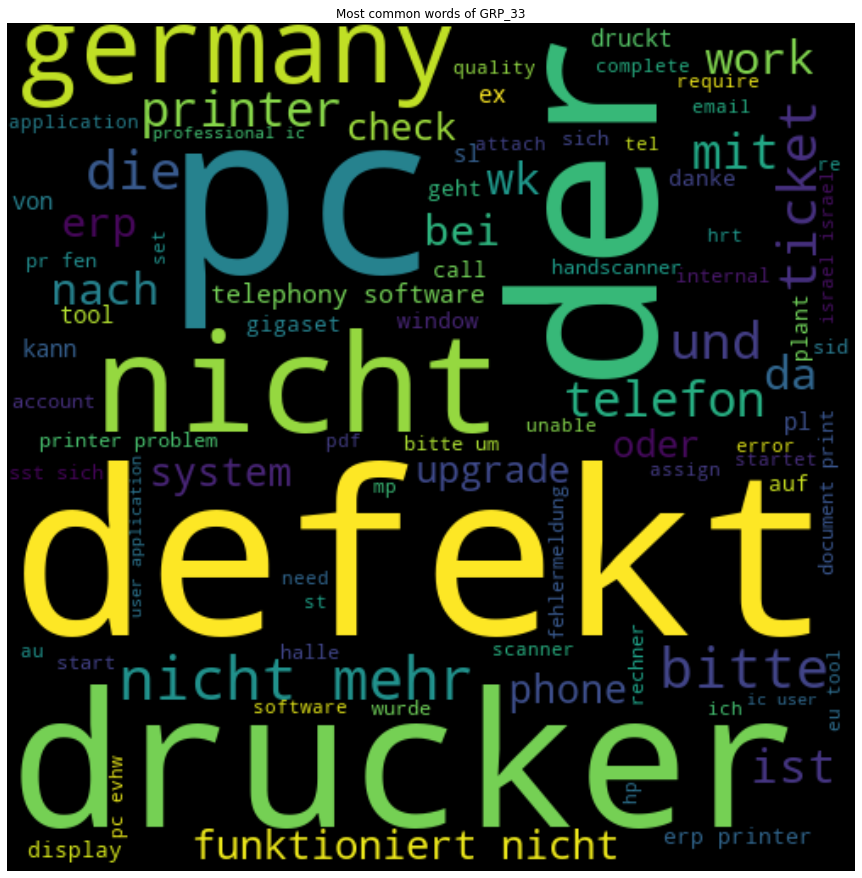

In [31]:
for i in range(16):
    generate_word_clod(' '.join(Ticket[Ticket['Assignment group'] == value[i]].Description.str.strip()),value[i])

# **Comments:**


It's indicative from the n-gram analysis and the word cloud is that the entire dataset speaks more about issues around

*   password reset
*   fail job & scheduler

Analysis on GRP_0 which is the most frequent group to assign a ticket to reveals that this group deals with mostly the maintenance problems such as password reset, account lock, login issue, ticket update etc.

Maximum of the tickets from GRP_0 can be reduced by self correcting itself by putting automation scripts/mechanisms to help resolve these common maintenance issues. This will help in lowering the inflow of service tickets thereby saving the person/hour efforts spend and increasing the business revenue.

In [32]:
#Export the data frame to a .csv file
Ticket.to_csv (r'/content/drive/My Drive/AIML/NLP/cleaned_data.csv', index = False, header=True)

# Build Models

Let's proceed towards trying different model architectures mentioned below to classify the problem and validate the best modeling technique:

*   Multinomial Naive Bayes
*   K Nearest neighbor (KNN)
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   Neural Network

Let's create another column of categorical datatype from Assignment groups. Let's write some generic methods for utilities and to plot evaluation metrics

In [33]:
# Create a target categorical column
Ticket['Target'] = Ticket['Assignment group'].astype('category').cat.codes
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8491 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8491 non-null   object
 1   Assignment group  8491 non-null   object
 2   Target            8491 non-null   int8  
dtypes: int8(1), object(2)
memory usage: 527.3+ KB


In [34]:
import warnings
# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Tools & Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

In [57]:
# Make a copy of the Ticket dataframe for future use
Ticket_copy = Ticket
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(Ticket.Description, 
                                                    Ticket.Target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6792,) (1699,)
Shape of the test set: (6792,) (1699,)


In [58]:
# A method to train and test the model
def run_classification(Prediction_model, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    clf = Prediction_model

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', Prediction_model),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1)
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the classifier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Prediction Model:', Prediction_model)
    print('-'*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('-'*80)
    #print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,value,value)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)
    print('-'*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

### Naive Bayes

Prediction Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
--------------------------------------------------------------------------------
Training accuracy: 60.64%
Testing accuracy: 58.27%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       795
           1       0.00      0.00      0.00        25
           2       0.78      0.15      0.25        48
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        43
           6       1.00      0.03      0.05        39
           7       1.00      0.38      0.55        68
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        39
          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


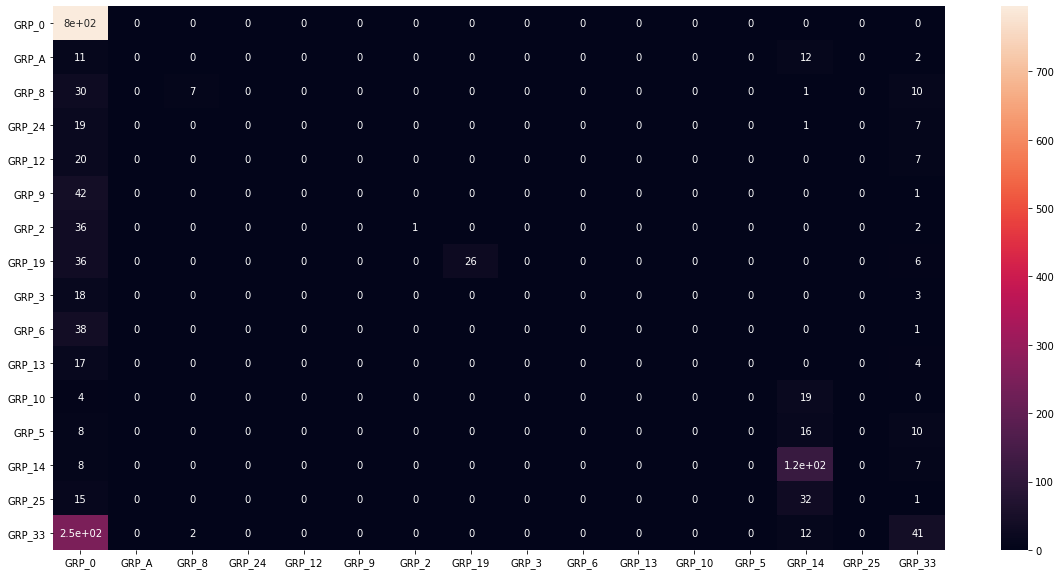

In [59]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

### K-Nearest Neighbor (KNN)

Prediction Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
Training accuracy: 55.45%
Testing accuracy: 53.86%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.57      0.70       795
           1       0.75      0.24      0.36        25
           2       0.72      0.38      0.49        48
           3       0.00      0.00      0.00        27
           4       1.00      0.11      0.20        27
           5       0.67      0.09      0.16        43
           6       0.90      0.23      0.37        39
           7       1.00      0.37      0.54 

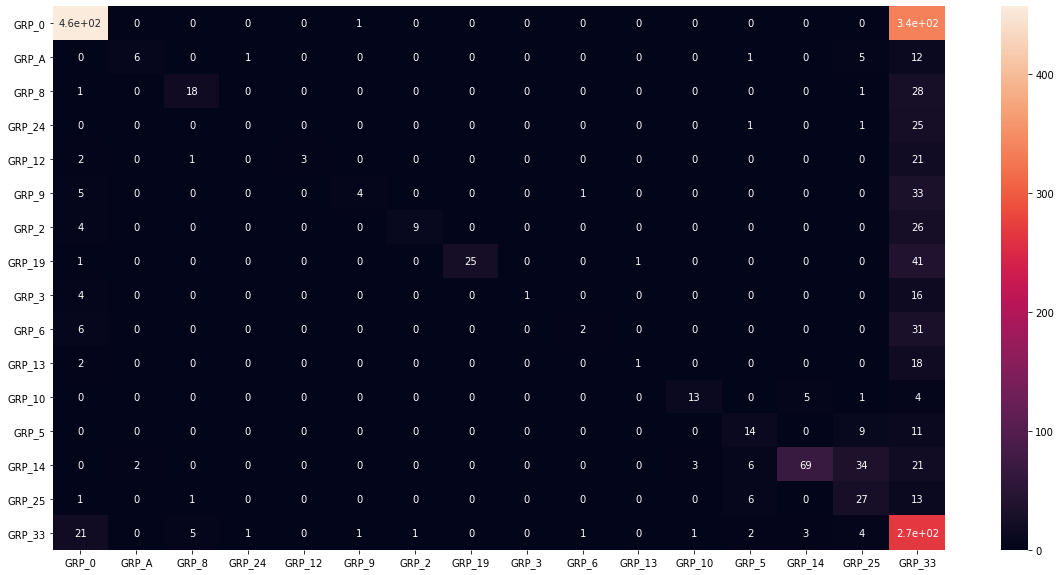

In [60]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

### Support Vector Machine (SVM)

#### Linear SVM

Prediction Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
--------------------------------------------------------------------------------
Training accuracy: 90.78%
Testing accuracy: 72.16%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       795
           1       0.71      0.48      0.57        25
           2       0.64      0.60      0.62        48
           3       0.60      0.56      0.58        27
           4       0.81      0.48      0.60        27
           5       0.55      0.28      0.37        43
           6       0.43      0.31      0.36        39
 

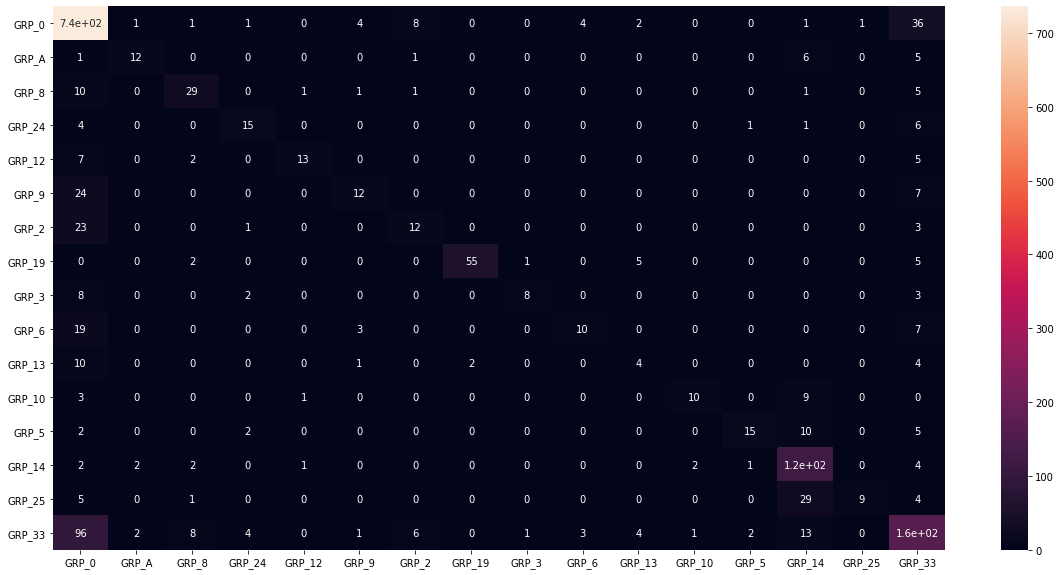

In [61]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

#### RBF SVM

Prediction Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 87.43%
Testing accuracy: 70.87%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       795
           1       0.75      0.24      0.36        25
           2       0.70      0.58      0.64        48
           3       1.00      0.33      0.50        27
           4       1.00      0.26      0.41        27
           5       0.75      0.07      0.13        43
           6       0.85      0.28  

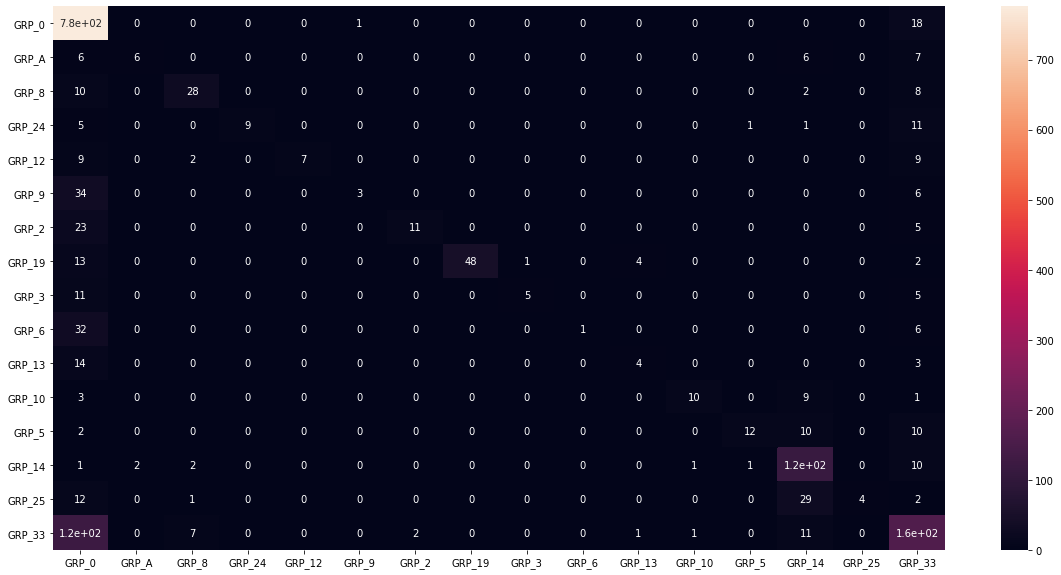

In [62]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

### Decision Trees

Prediction Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--------------------------------------------------------------------------------
Training accuracy: 95.08%
Testing accuracy: 63.39%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       795
           1       0.42      0.32      0.36        25
           2       0.59      0.62      0.61        48
           3       0

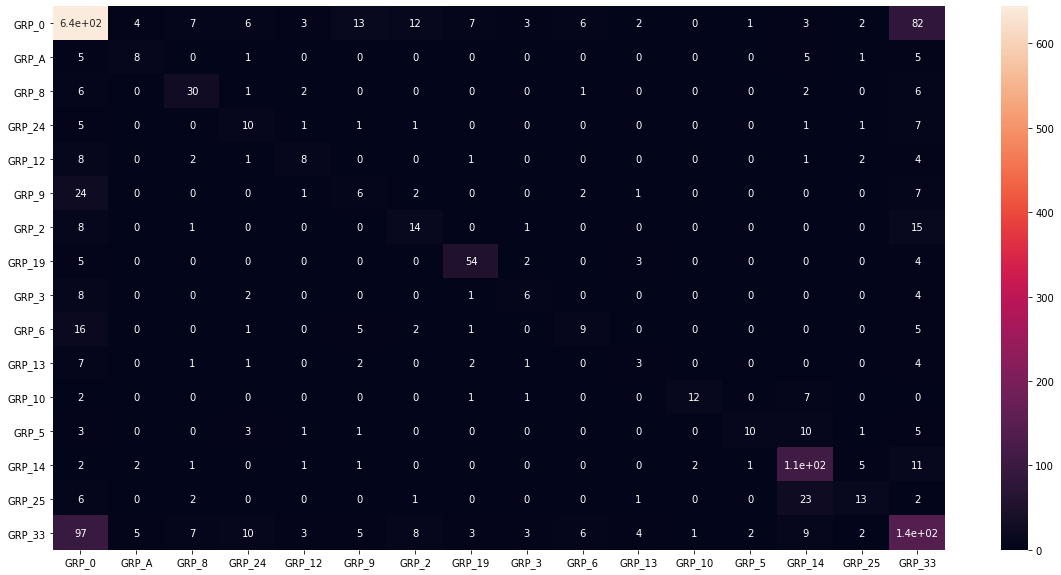

In [63]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

## **Random Forest Classifier**

Prediction Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 95.08%
Testing accuracy: 68.33%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81       795
        

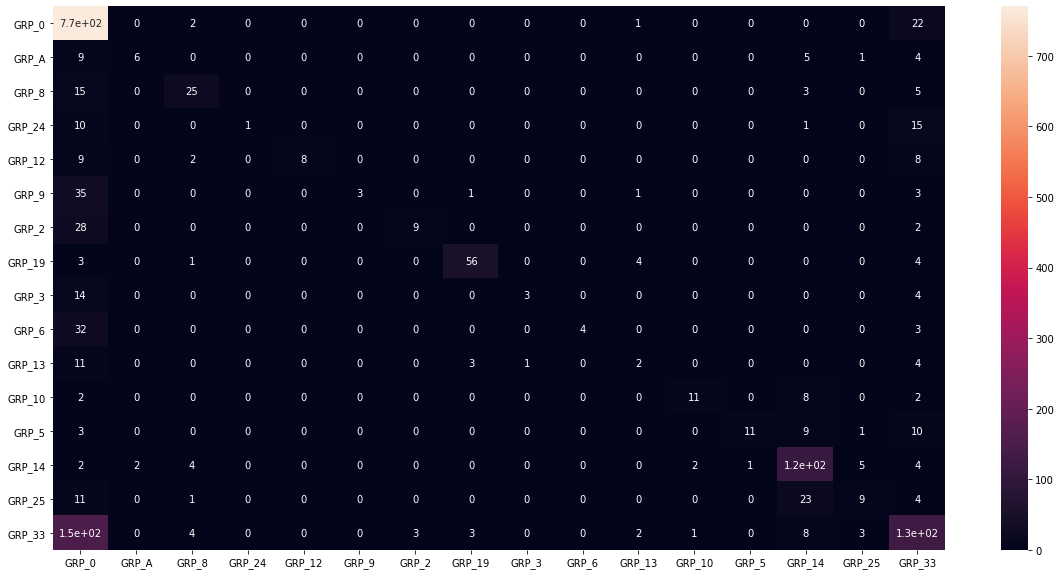

In [64]:
from sklearn.ensemble import RandomForestClassifier
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Observation:

1. All the above models are higly overfitted as the training accuracy is high and testing accuracy is low :-
- Multinomial - Training - 60%     : Testing - 58%
- KNN         - Training - 56%     : Testing - 54%
- Linear SVM  - Training - 91%     : Testing - 72%
- Rbf SVM  - Training - 87%     : Testing - 71%
- Decision Tree  - Training - 95%     : Testing - 63%
- Random forest  - Training - 95%     : Testing - 68%




## Convolutional Neural Network

In [65]:
from keras.models import Sequential, Model
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.layers.merge import Concatenate

In [66]:
# Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [67]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Ticket.Description)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 16)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               2560512   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)              

In [68]:
import os
project_path = '/content/drive/My Drive/AIML/NLP'
os.chdir(project_path)
# Create embedding matrix
EMBEDDING_FILE = 'glove.6B.200d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=200
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

In [69]:
def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [70]:
# Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,EMBEDDING_FILE)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 11292 unique tokens.
(8491, 500)
Total 400000 word vectors.


In [71]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
  # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [72]:
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 17)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 500, 200)     2258600     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 499, 128)     51328       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 498, 128)     76928       embedding_2[0][0]                
_______________________________________________________________________________________

Epoch 1/10
54/54 [==============================] - 7s 134ms/step - loss: 2.3533 - accuracy: 0.4290 - val_loss: 2.0633 - val_accuracy: 0.4679
Epoch 2/10
54/54 [==============================] - 7s 128ms/step - loss: 1.9419 - accuracy: 0.4770 - val_loss: 2.4416 - val_accuracy: 0.4697
Epoch 3/10
54/54 [==============================] - 7s 129ms/step - loss: 1.8222 - accuracy: 0.4845 - val_loss: 2.5060 - val_accuracy: 0.4632
Epoch 4/10
54/54 [==============================] - 7s 131ms/step - loss: 1.6329 - accuracy: 0.5187 - val_loss: 2.3157 - val_accuracy: 0.4991
Epoch 5/10
54/54 [==============================] - 7s 130ms/step - loss: 1.4927 - accuracy: 0.5468 - val_loss: 2.2178 - val_accuracy: 0.5344
Epoch 6/10
54/54 [==============================] - 7s 131ms/step - loss: 1.4342 - accuracy: 0.5614 - val_loss: 2.0078 - val_accuracy: 0.5686
Epoch 7/10
54/54 [==============================] - 7s 131ms/step - loss: 1.3573 - accuracy: 0.5833 - val_loss: 1.7962 - val_accuracy: 0.5868
Epoch 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


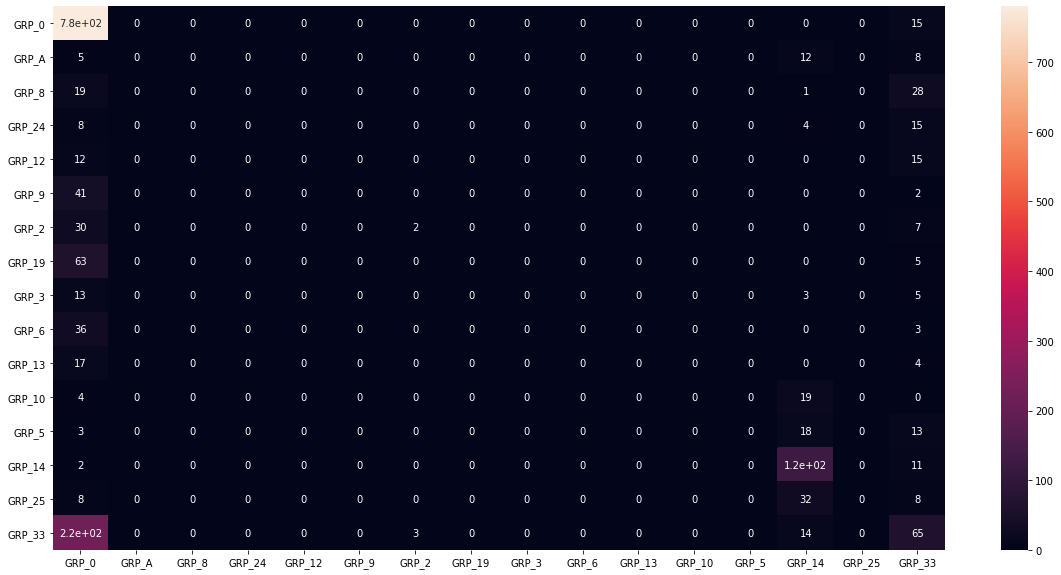

In [73]:
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True)

## Recurrent Neural Network (GRU)

In [74]:
# Build GRU model
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [75]:
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 17)

32
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 200)          2258600   
_________________________________________________________________
gru_4 (GRU)                  (None, 500, 32)           22464     
_________________________________________________________________
dropout_22 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 500, 32)           128       
_________________________________________________________________
gru_5 (GRU)                  (None, 500, 32)           6336      
_________________________________________________________________
dropout_23 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 500, 32)       

Epoch 1/10
54/54 [==============================] - 283s 5s/step - loss: 3.1864 - accuracy: 0.1019 - val_loss: 2.5046 - val_accuracy: 0.4715
Epoch 2/10
54/54 [==============================] - 284s 5s/step - loss: 2.5500 - accuracy: 0.2775 - val_loss: 2.1357 - val_accuracy: 0.5262
Epoch 3/10
54/54 [==============================] - 286s 5s/step - loss: 2.1616 - accuracy: 0.4202 - val_loss: 1.9600 - val_accuracy: 0.5280
Epoch 4/10
54/54 [==============================] - 289s 5s/step - loss: 1.9824 - accuracy: 0.4711 - val_loss: 1.8568 - val_accuracy: 0.5297
Epoch 5/10
54/54 [==============================] - 292s 5s/step - loss: 1.8906 - accuracy: 0.4979 - val_loss: 1.7849 - val_accuracy: 0.5209
Epoch 6/10
54/54 [==============================] - 287s 5s/step - loss: 1.8296 - accuracy: 0.5063 - val_loss: 1.7271 - val_accuracy: 0.5427
Epoch 7/10
54/54 [==============================] - 283s 5s/step - loss: 1.7793 - accuracy: 0.5116 - val_loss: 1.7360 - val_accuracy: 0.5486
Epoch 8/10
54

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


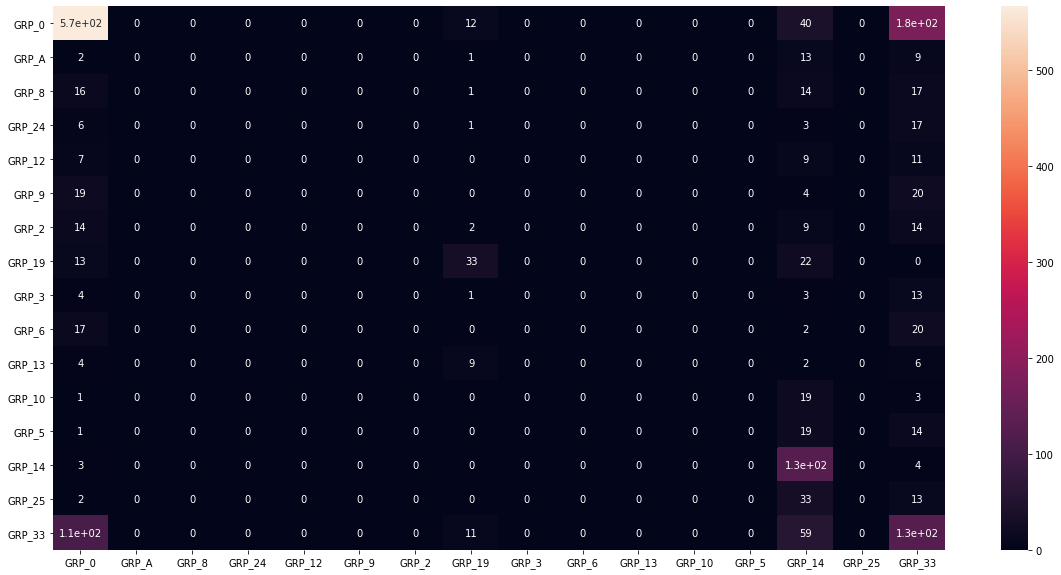

In [76]:
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True)

# Summary - Initial Report

Amongst all the model architectures we've tried, the accuracy of each of the model is as follows in the table. Statistical models are overfitted to a higher degree. One obvious reason is the dataset is highly imbalanced. And Neural networks need to be fine tuned to increase accuracy. 

Following are some of the techniques we'll be trying in Milestone-2 as part of fine tuning.

*   Dealing with imbalanced dataset.
*   Running GridSearchCV to perform hyper-parameter tuning.
*   Altering intermediate layers in case of Neural networks

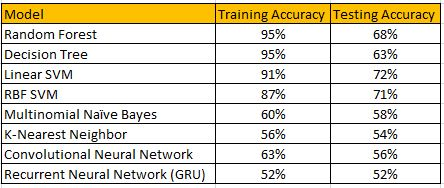



# Milestone 2 - Fine tune

## Dealing with Imbalanced dataset - Approach 1 - Split the data into Training, Validation and Test data sets


In [81]:
Ticket2 = Ticket
Ticket3 = Ticket
Ticket2.head()

Description Assignment group  Target
0  login issue verify user detail employee and ma...            GRP_0       0
1  outlook hello team meeting skype meeting etc b...            GRP_0       0
2  can not log in to vpn hi can not log on to vpn...            GRP_0       0
3  unable to access hr tool page unable to access...            GRP_0       0
4                            skype error skype error            GRP_0       0

In [85]:
# Split the data into Training, Validation and Test data sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(Ticket.Description, Ticket.Target, test_size=0.2, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

print('\033[1mShape of the training set:\033[0m', X_train1.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', X_test1.shape, y_test.shape)
print('\033[1mShape of the validation set:\033[0m', X_val.shape, y_test.shape)

Shape of the training set: (5094,) (1699,)
Shape of the test set: (1699,) (1699,)
Shape of the validation set: (1698,) (1699,)


### Modeling with Dataset split into Training, Validation and Test data sets

#### Multinomial Naive Bayes

Prediction Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
--------------------------------------------------------------------------------
Training accuracy: 59.97%
Testing accuracy: 56.12%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73       797
           1       0.00      0.00      0.00        26
           2       1.00      0.04      0.07        55
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        50
           6       1.00      0.02      0.03        58
           7       1.00      0.29      0.45        65
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00        36
          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


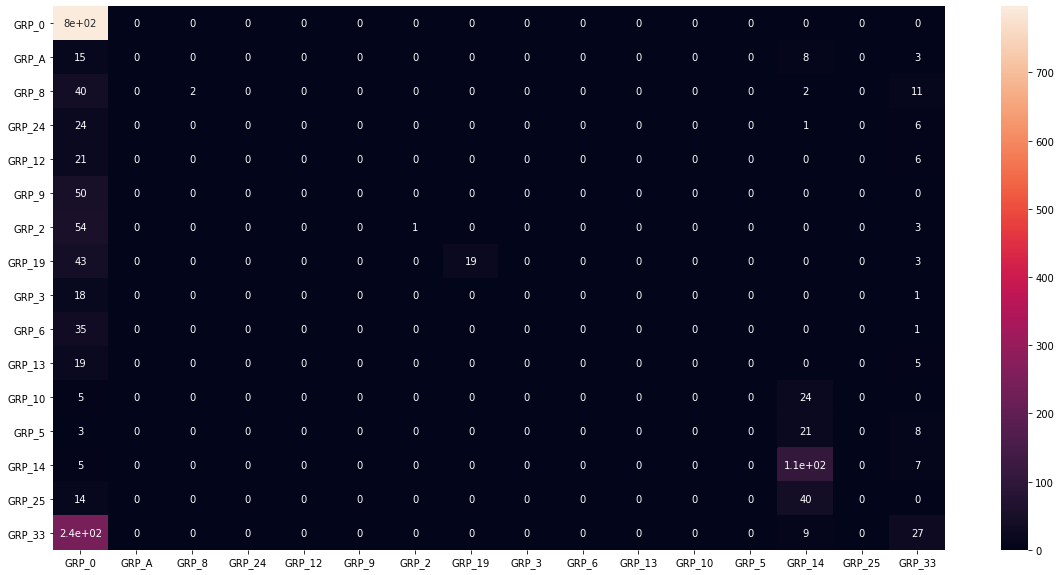

In [92]:
# Multinomial NB with Validation dataset
run_classification(MultinomialNB(), X_train1, X_val, y_train1, y_val)

Prediction Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
--------------------------------------------------------------------------------
Training accuracy: 59.97%
Testing accuracy: 57.39%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73       795
           1       0.00      0.00      0.00        25
           2       0.80      0.08      0.15        48
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        39
           7       1.00      0.31      0.47        68
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        39
          

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


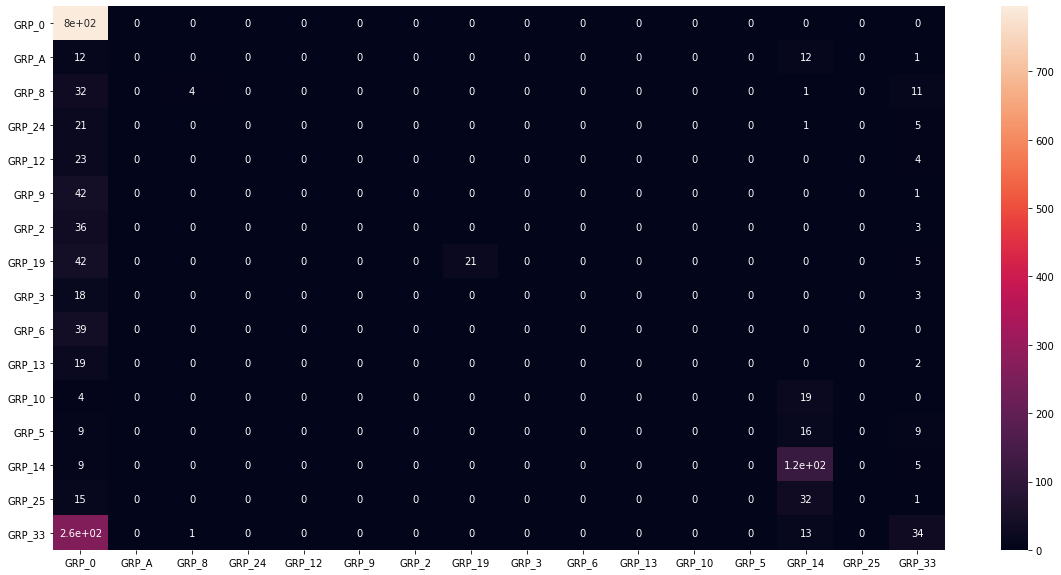

In [95]:
# Multinomial NB with Test dataset
run_classification(MultinomialNB(), X_train1, X_test1, y_train1, y_test1)

Prediction Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
Training accuracy: 55.05%
Testing accuracy: 49.59%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.54      0.68       797
           1       1.00      0.15      0.27        26
           2       0.67      0.15      0.24        55
           3       0.00      0.00      0.00        31
           4       0.50      0.07      0.13        27
           5       0.50      0.04      0.07        50
           6       0.85      0.19      0.31        58
           7       0.96      0.37      0.53 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


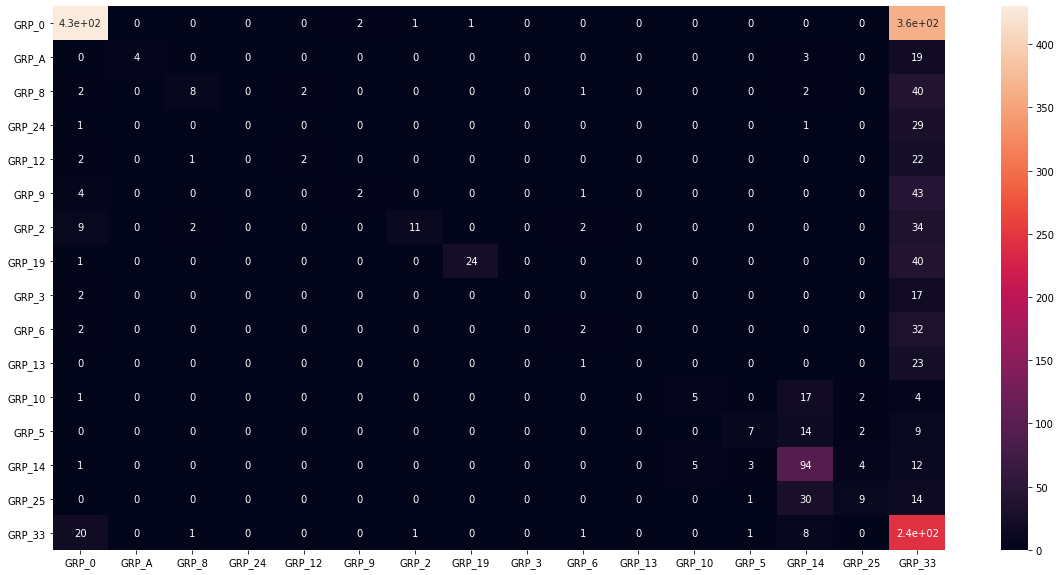

In [93]:
# KNN with Validation dataset
run_classification(KNeighborsClassifier(), X_train1, X_val, y_train1, y_val)

In [96]:
# KNN with Test dataset
run_classification(KNeighborsClassifier(), X_train1, X_test1, y_train1, y_test1)

Prediction Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
Training accuracy: 55.05%
Testing accuracy: 52.80%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.55      0.68       795
           1       0.56      0.20      0.29        25
           2       0.64      0.29      0.40        48
           3       0.00      0.00      0.00        27
           4       1.00      0.07      0.14        27
           5       0.50      0.02      0.04        43
           6       0.90      0.23      0.37        39
           7       1.00      0.37      0.54 

Prediction Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
--------------------------------------------------------------------------------
Training accuracy: 91.46%
Testing accuracy: 68.61%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       797
           1       0.89      0.31      0.46        26
           2       0.74      0.56      0.64        55
           3       0.69      0.35      0.47        31
           4       0.52      0.41      0.46        27
           5       0.44      0.24      0.31        50
           6       0.83      0.34      0.49        58
 

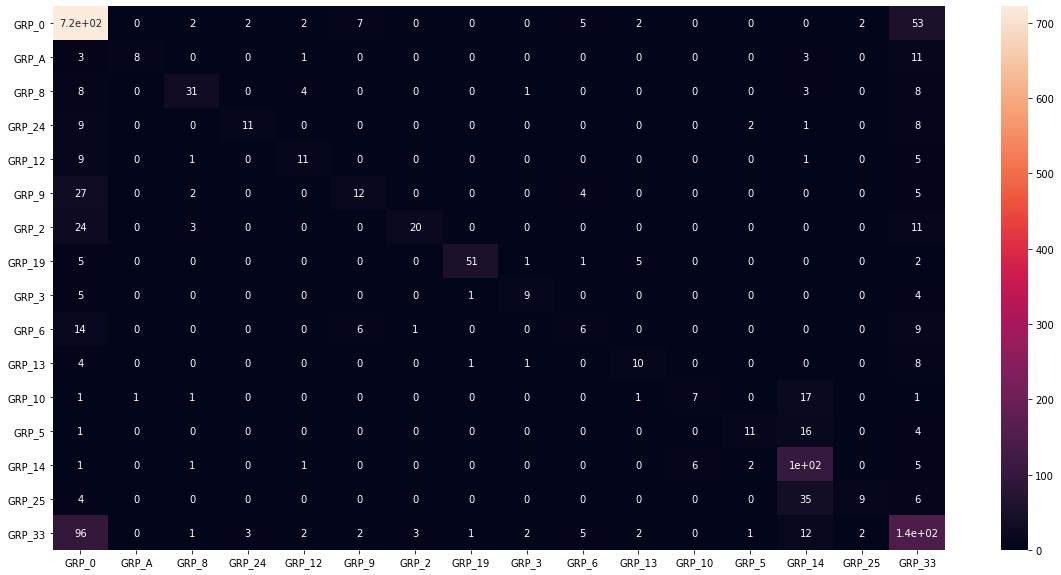

In [94]:
# SVM with Linear kernel with validation dataset
run_classification(LinearSVC(), X_train1, X_val, y_train1, y_val)

In [100]:
# SVM with Linear kernel with test dataset
run_classification(LinearSVC(), X_train1, X_test1, y_train1, y_test1)

Prediction Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
--------------------------------------------------------------------------------
Training accuracy: 91.46%
Testing accuracy: 70.28%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       795
           1       0.67      0.32      0.43        25
           2       0.59      0.54      0.57        48
           3       0.62      0.56      0.59        27
           4       0.80      0.44      0.57        27
           5       0.26      0.12      0.16        43
           6       0.52      0.31      0.39        39
 

Prediction Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 86.98%
Testing accuracy: 66.61%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       797
           1       1.00      0.19      0.32        26
           2       0.81      0.45      0.58        55
           3       1.00      0.10      0.18        31
           4       0.60      0.22      0.32        27
           5       0.75      0.06      0.11        50
           6       0.87      0.22  

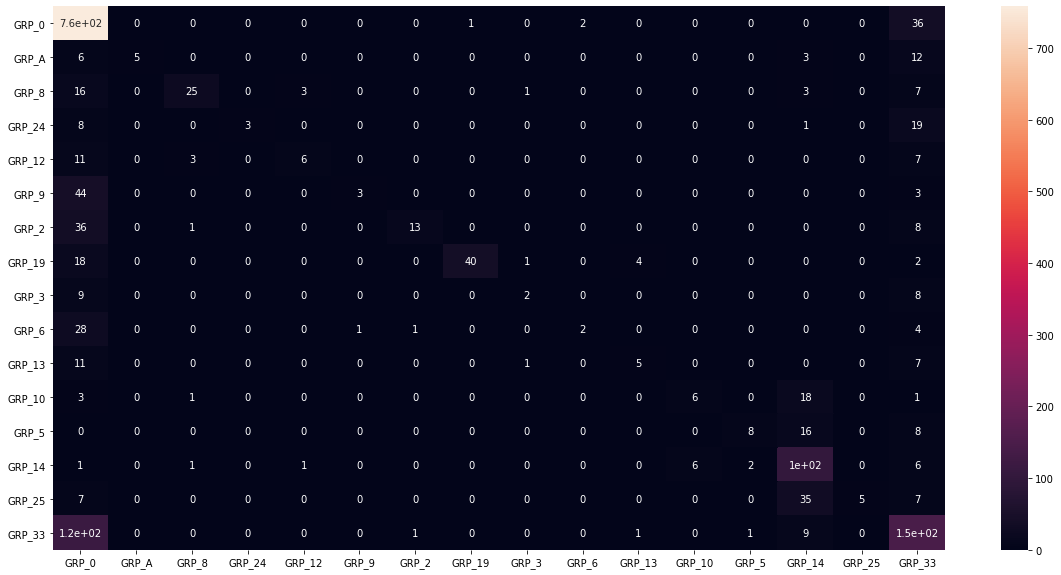

In [97]:
# SVM with RBF kernel with validation dataset
run_classification(SVC(kernel='rbf'), X_train1, X_val, y_train1, y_val)

Prediction Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 86.98%
Testing accuracy: 69.04%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82       795
           1       0.75      0.24      0.36        25
           2       0.67      0.46      0.54        48
           3       1.00      0.26      0.41        27
           4       0.83      0.19      0.30        27
           5       1.00      0.05      0.09        43
           6       0.83      0.26  

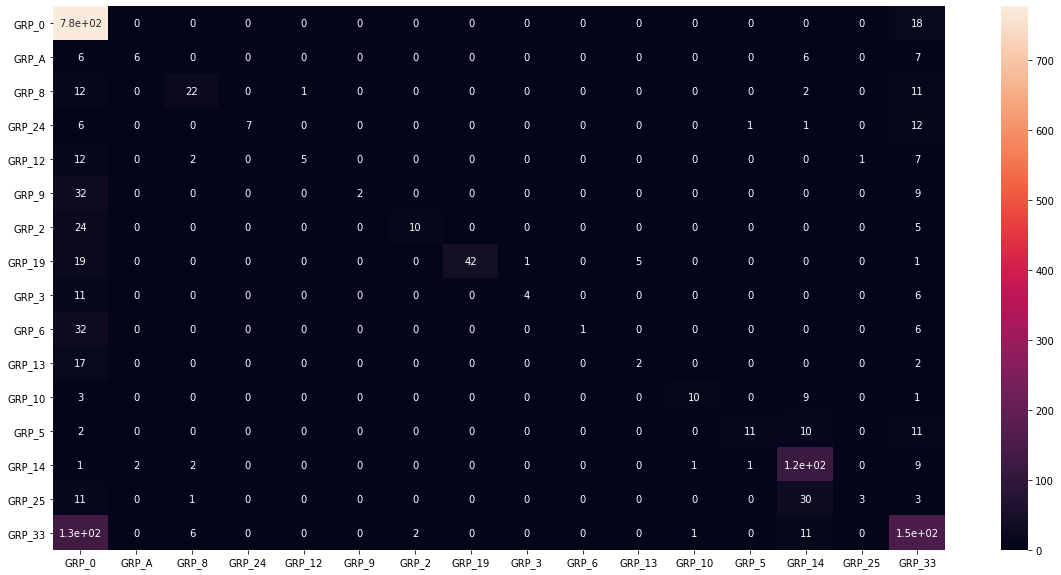

In [90]:
# SVM with RBF kernel with test dataset
run_classification(SVC(kernel='rbf'), X_train1, X_test1, y_train1, y_test1)

Prediction Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--------------------------------------------------------------------------------
Training accuracy: 95.13%
Testing accuracy: 58.48%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       797
           1       0.35      0.27      0.30        26
           2       0.58      0.51      0.54        55
           3       0

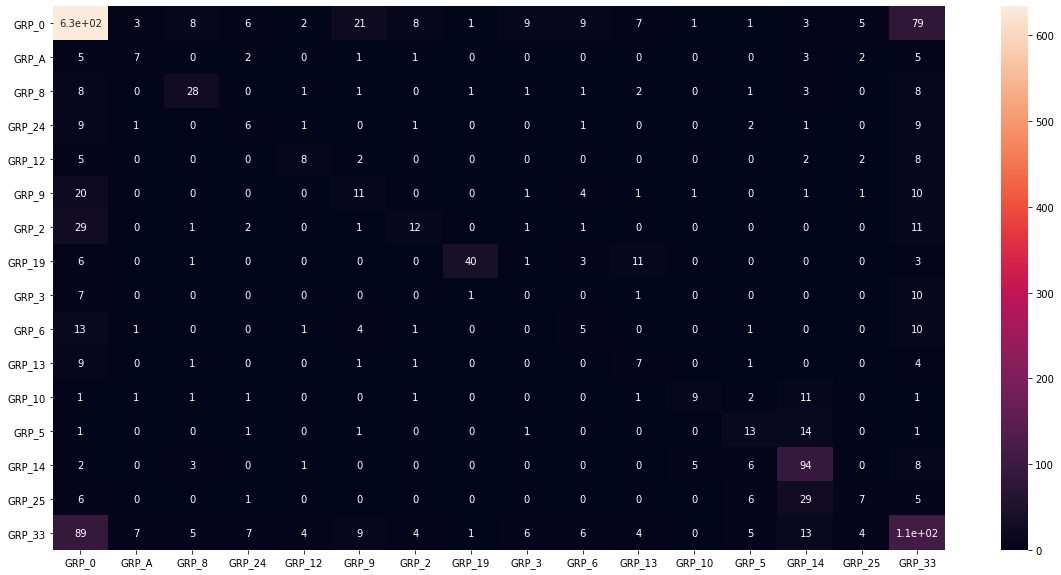

In [98]:
# Decision Tree with Validation dataset
run_classification(DecisionTreeClassifier(), X_train1, X_val, y_train1, y_val)

Prediction Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--------------------------------------------------------------------------------
Training accuracy: 95.13%
Testing accuracy: 60.39%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       795
           1       0.43      0.24      0.31        25
           2       0.42      0.52      0.47        48
           3       0

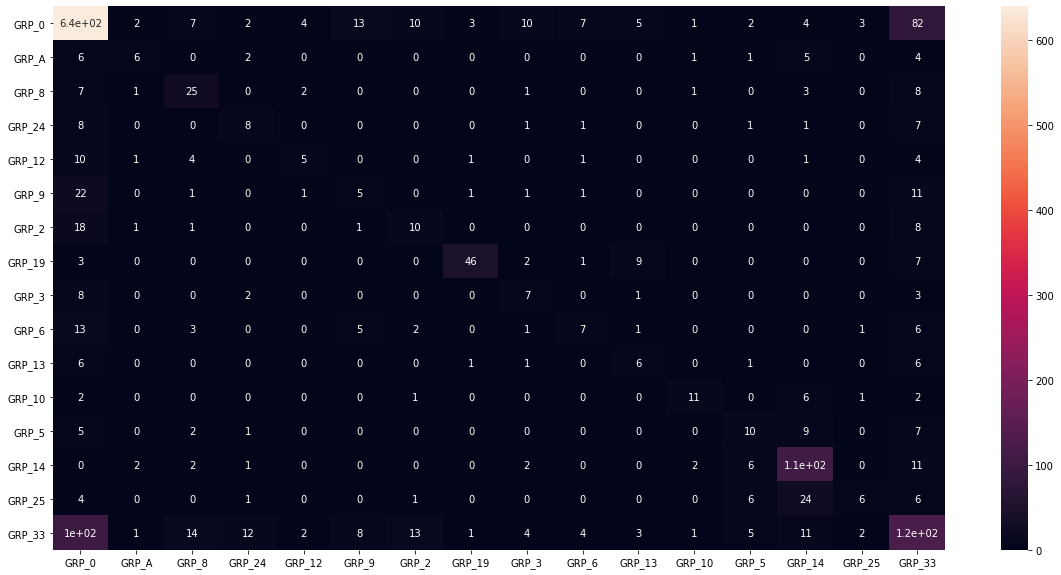

In [91]:
# Decision Tree with test dataset
run_classification(DecisionTreeClassifier(), X_train1, X_test1, y_train1, y_test1)

Prediction Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 95.13%
Testing accuracy: 65.31%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.79       797
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


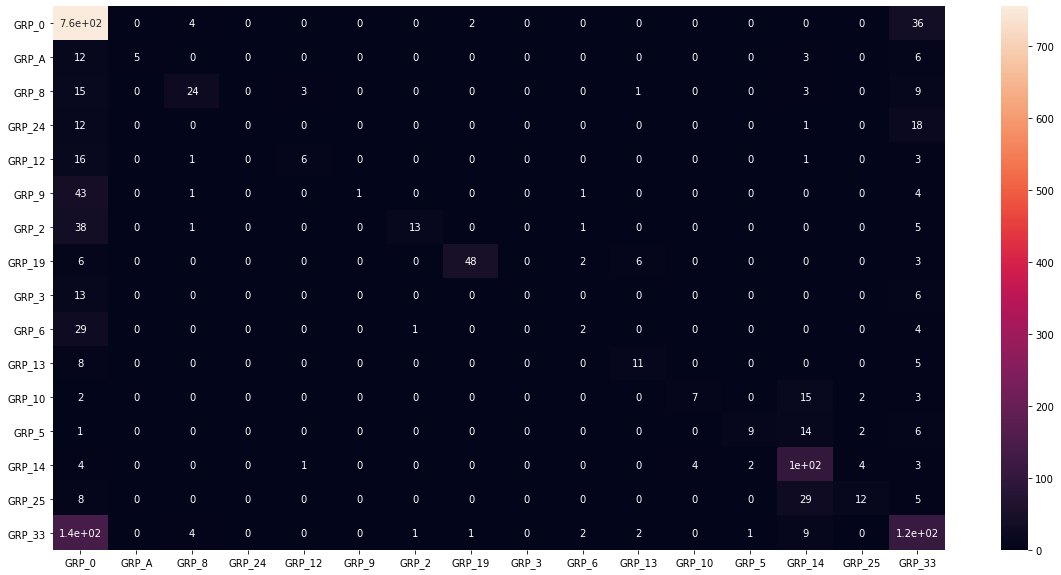

In [99]:
# RandomForest Classifier with Validation dataset
run_classification(RandomForestClassifier(n_estimators=100), X_train1, X_val, y_train1, y_val)

In [101]:
#RandomForest Classifier with Test dataset
run_classification(RandomForestClassifier(n_estimators=100), X_train1, X_test1, y_train1, y_test1)

Prediction Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 95.13%
Testing accuracy: 66.63%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.68      0.95      0.80       795
        

Approach 2 - 

## Dealing with Imbalanced dataset - Approach 2 - Resampling technique (Upsampling)

In [133]:
Ticket3 = Ticket
Ticket3.head()

Description Assignment group  Target
0  login issue verify user detail employee and ma...            GRP_0       0
1  outlook hello team meeting skype meeting etc b...            GRP_0       0
2  can not log in to vpn hi can not log on to vpn...            GRP_0       0
3  unable to access hr tool page unable to access...            GRP_0       0
4                            skype error skype error            GRP_0       0

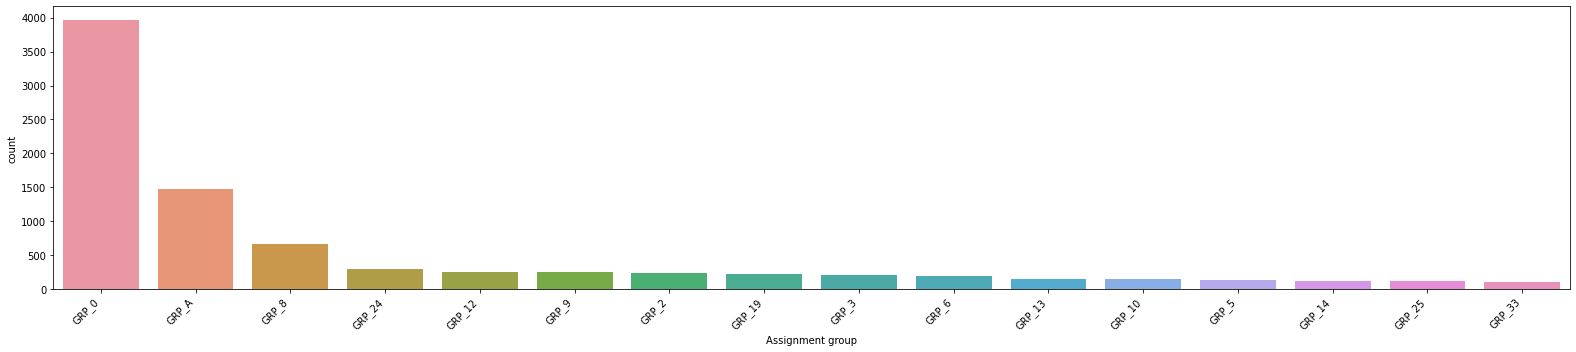

In [134]:
target_count = Ticket3['Target'].value_counts().sort_values(ascending=False).index
target_count

descending_order = Ticket3['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#added code for x label rotate 
ax=sns.countplot(x='Assignment group', data=Ticket2, order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

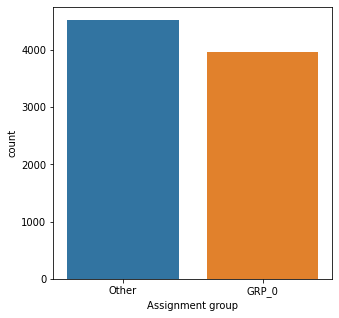

In [135]:
# Create the Dataset for classifying GRP_0
Ticket_GRP0 = Ticket3.copy()
Ticket_GRP0['Assignment group']= Ticket_GRP0['Assignment group'].apply(lambda x : 'Other' if x != 'GRP_0'  else x)

descending_order = Ticket_GRP0['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=Ticket_GRP0, order=descending_order)

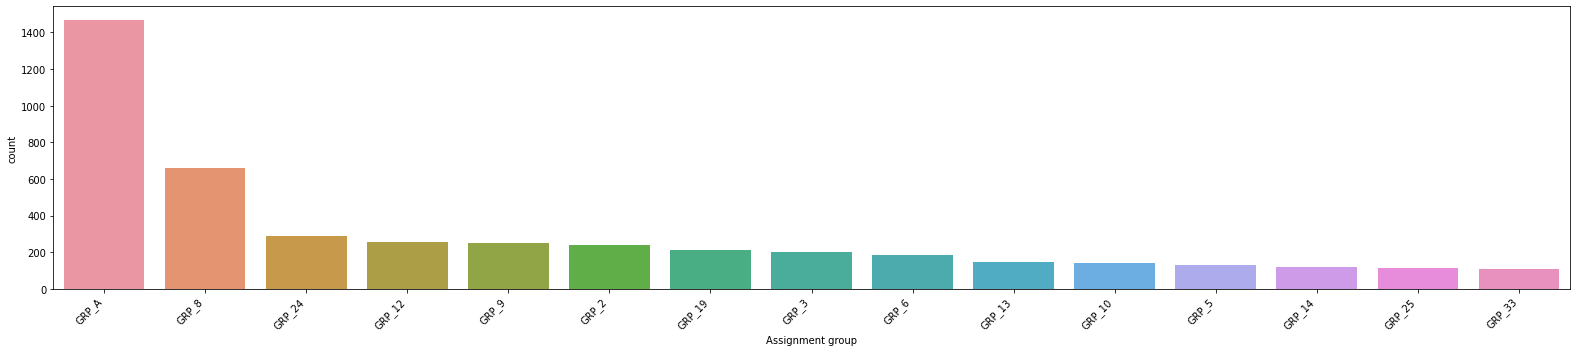

In [136]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
Ticket_Others = Ticket3[Ticket3['Assignment group'] != 'GRP_0']

descending_order = Ticket_Others['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data = Ticket_Others, order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

We can notice that there is high imbalance in the group

In [137]:
max = Ticket3['Assignment group'].value_counts().max()
max

3968

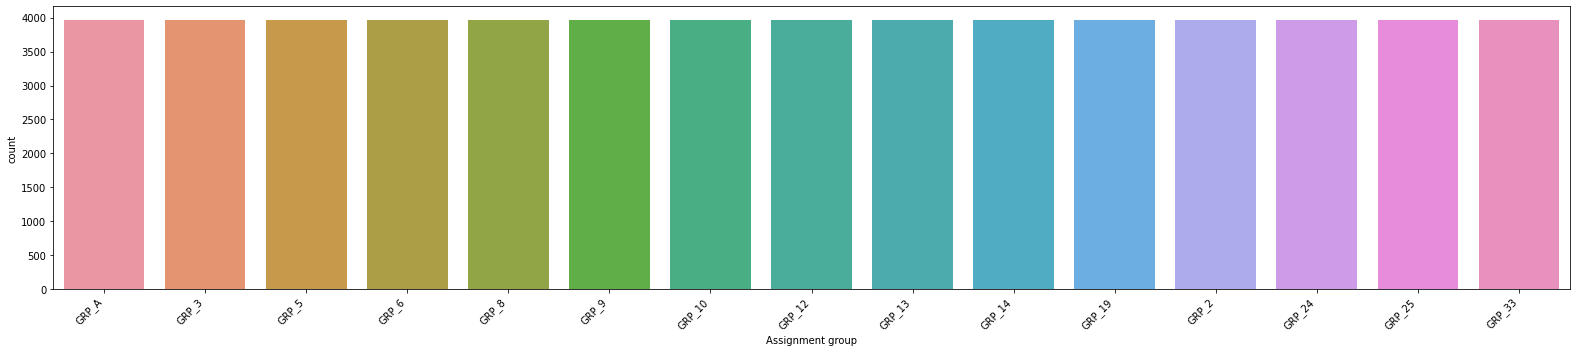

In [138]:
# Treat the imbalnce in the 'other' dataset by resampling (upsampling)
from sklearn.utils import resample
TicketOthers_resampled = Ticket_Others[0:0]
for grp in Ticket_Others['Assignment group'].unique():
    Ticket3 = Ticket_Others[Ticket_Others['Assignment group'] == grp]
    resampled = resample(Ticket3, replace=True, n_samples=int(max), random_state=123)
    TicketOthers_resampled = TicketOthers_resampled.append(resampled)

otherGrpsResampled = pd.concat([Ticket_GRP0,TicketOthers_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = TicketOthers_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=TicketOthers_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

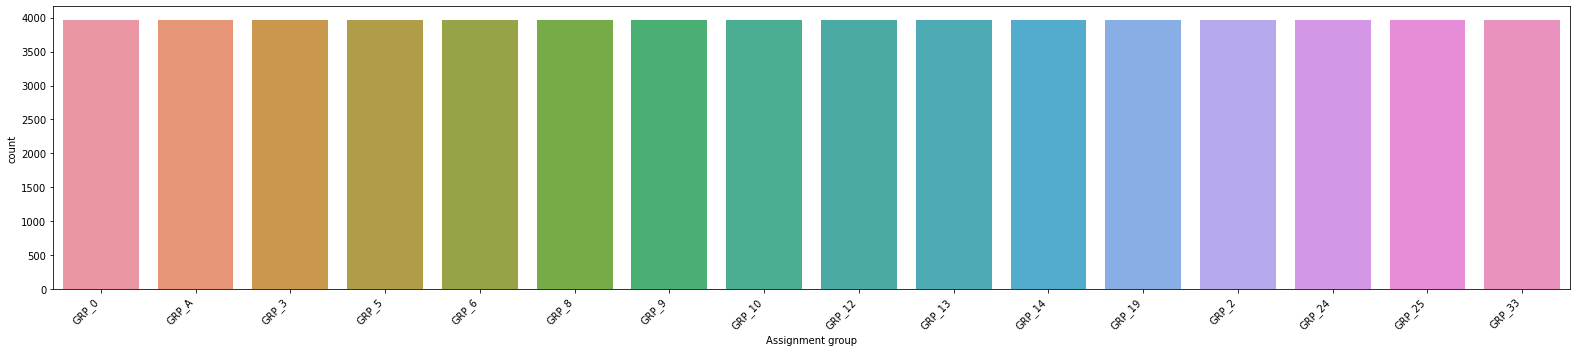

In [140]:
# Treat the imbalance in the Ticket dataset by resampling to 3968.This is for us to try creating a single model which use the whole dataset & verify the performance
Ticket_resampled = Ticket[0:0]
for grp in Ticket['Assignment group'].unique():
    TicketGrp = Ticket[Ticket['Assignment group'] == grp]
    resampled = resample(TicketGrp, replace=True, n_samples=int(max), random_state=123)
    Ticket_resampled = Ticket_resampled.append(resampled)

descending_order = Ticket_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=Ticket_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Label Encoding 'Assignment group' target class

In [141]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe = label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping

#itTicketGRP0DF['Assignment group'] , grp_mapping_grp0= labelencoder(itTicketGRP0DF['Assignment group'])
#itTicketOthersDF_resampled['Assignment group'] , grp_mapping_others_resampled= labelencoder(Ticket_resampled['Assignment group'])
otherGrpsResampled['Assignment group'] , grp_mapping_others_resampled = labelencoder(otherGrpsResampled['Assignment group'])
Ticket_resampled['Assignment group'] , grp_mapping_all_resampled = labelencoder(Ticket_resampled['Assignment group'])
Ticket['Assignment group'],grp_mapping_all_raw = labelencoder(Ticket['Assignment group'])

In [142]:
#Export the data frame to a .csv file
Ticket_resampled.to_csv (r'/content/drive/My Drive/AIML/NLP/resampled_data.csv', index = False, header=True)

In [144]:
X_trainresampled, X_testresampled, y_trainresampled, y_testresampled = train_test_split(Ticket_resampled.Description, 
                                                    Ticket_resampled.Target, 
                                                    test_size=0.30, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_trainresampled.shape, X_testresampled.shape)
print('\033[1mShape of the test set:\033[0m', y_trainresampled.shape, y_testresampled.shape)

Shape of the training set: (44441,) (19047,)
Shape of the test set: (44441,) (19047,)


## Modeling with resampled data

### Multinomial Naive Bayes

In [145]:
run_classification(MultinomialNB(), X_trainresampled, X_testresampled, y_trainresampled, y_testresampled)

Prediction Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
--------------------------------------------------------------------------------
Training accuracy: 82.42%
Testing accuracy: 81.44%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      1218
           1       0.97      0.82      0.89      1223
           2       0.89      0.88      0.88      1189
           3       0.82      0.98      0.89      1222
           4       0.90      0.94      0.92      1234
           5       0.81      0.89      0.85      1138
           6       0.86      0.93      0.89      1200
           7       0.98      0.95      0.97      1194
           8       0.93      0.97      0.95      1180
           9       0.84      0.94      0.88      1175
          

### K-Nearest Neighbor

Prediction Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
--------------------------------------------------------------------------------
Training accuracy: 87.83%
Testing accuracy: 86.89%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.51      0.66      1218
           1       0.99      0.84      0.91      1223
           2       0.98      0.96      0.97      1189
           3       1.00      0.98      0.99      1222
           4       0.99      1.00      0.99      1234
           5       0.97      0.99      0.98      1138
           6       0.98      0.99      0.99      1200
           7       1.00      1.00      1.00 

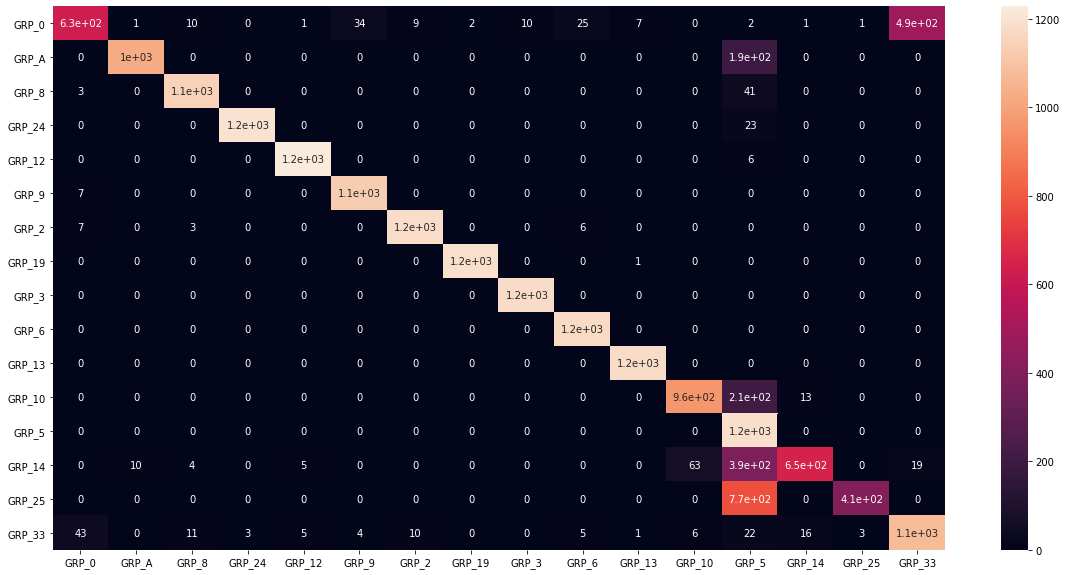

In [146]:
run_classification(KNeighborsClassifier(), X_trainresampled, X_testresampled, y_trainresampled, y_testresampled)

### Support Vector Machine (SVM)

#### Linear SVM

Prediction Model: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
--------------------------------------------------------------------------------
Training accuracy: 90.42%
Testing accuracy: 89.49%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1218
           1       0.99      0.84      0.91      1223
           2       0.97      0.96      0.97      1189
           3       0.99      0.98      0.98      1222
           4       0.99      1.00      0.99      1234
           5       0.96      0.99      0.97      1138
           6       0.97      0.99      0.98      1200
 

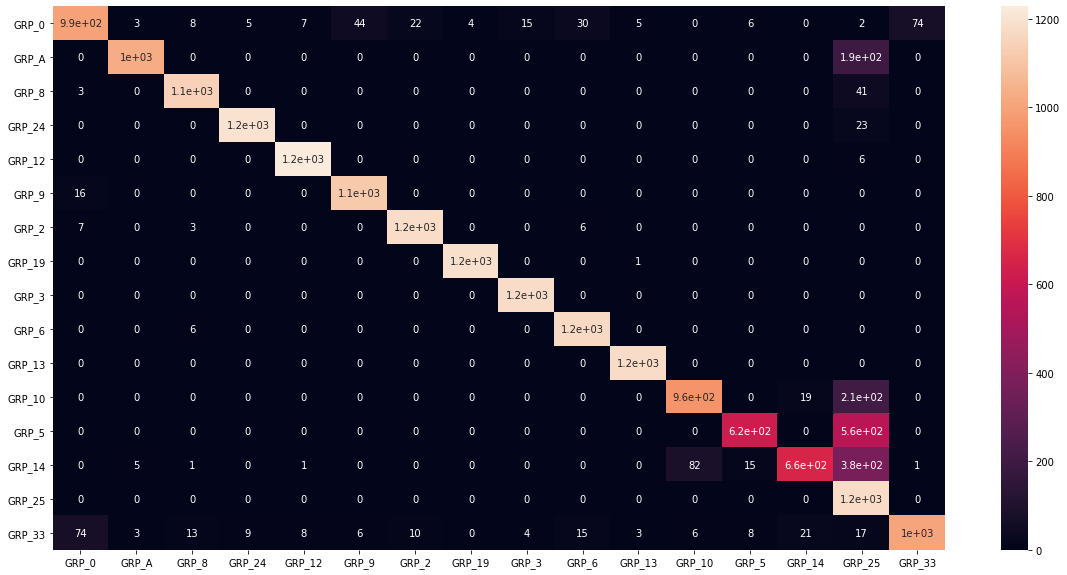

In [147]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_trainresampled, X_testresampled, y_trainresampled, y_testresampled)

#### RBF SVM

Prediction Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
--------------------------------------------------------------------------------
Training accuracy: 91.22%
Testing accuracy: 90.61%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1218
           1       1.00      0.84      0.91      1223
           2       0.99      0.96      0.98      1189
           3       1.00      0.98      0.99      1222
           4       0.99      1.00      0.99      1234
           5       0.98      1.00      0.99      1138
           6       0.99      0.98  

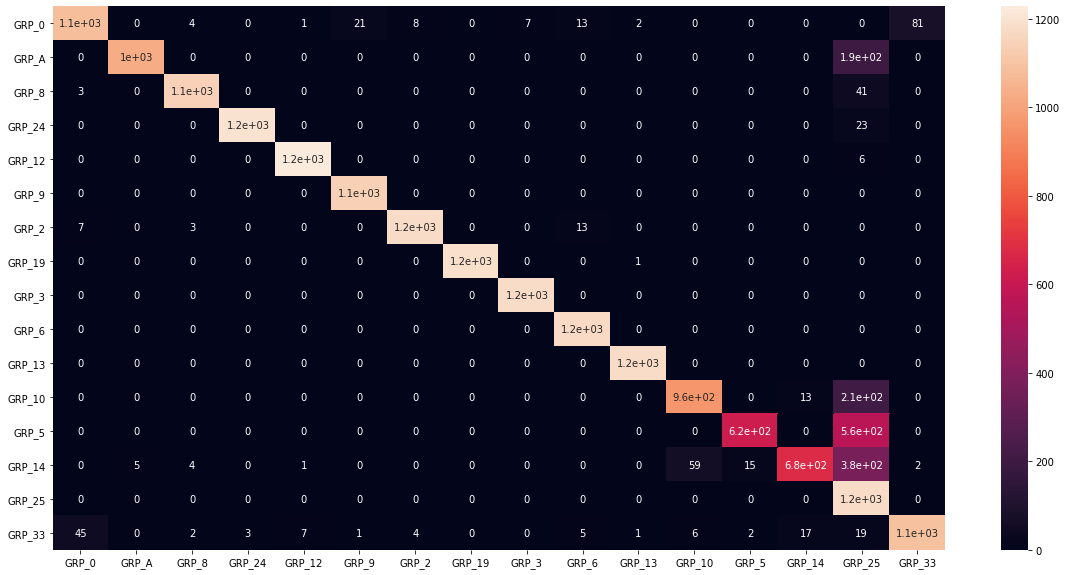

In [148]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_trainresampled, X_testresampled, y_trainresampled, y_testresampled)

### Decision Trees

Prediction Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
--------------------------------------------------------------------------------
Training accuracy: 91.49%
Testing accuracy: 89.98%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      1218
           1       0.99      0.84      0.91      1223
           2       0.98      0.96      0.97      1189
           3       0

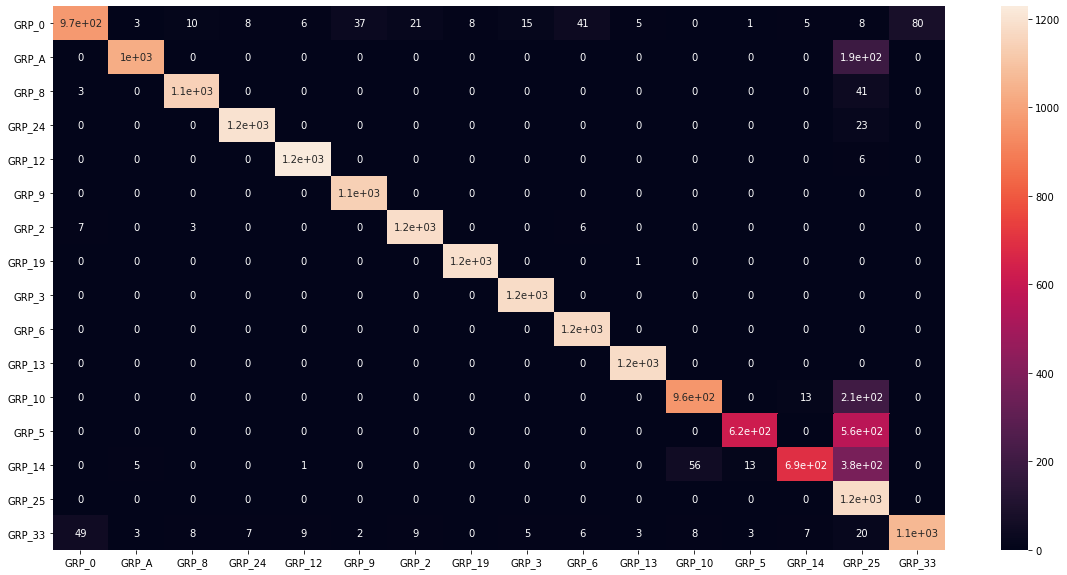

In [149]:
run_classification(DecisionTreeClassifier(), X_trainresampled, X_testresampled, y_trainresampled, y_testresampled)

### Random Forest

Prediction Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
--------------------------------------------------------------------------------
Training accuracy: 91.49%
Testing accuracy: 90.90%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1218
        

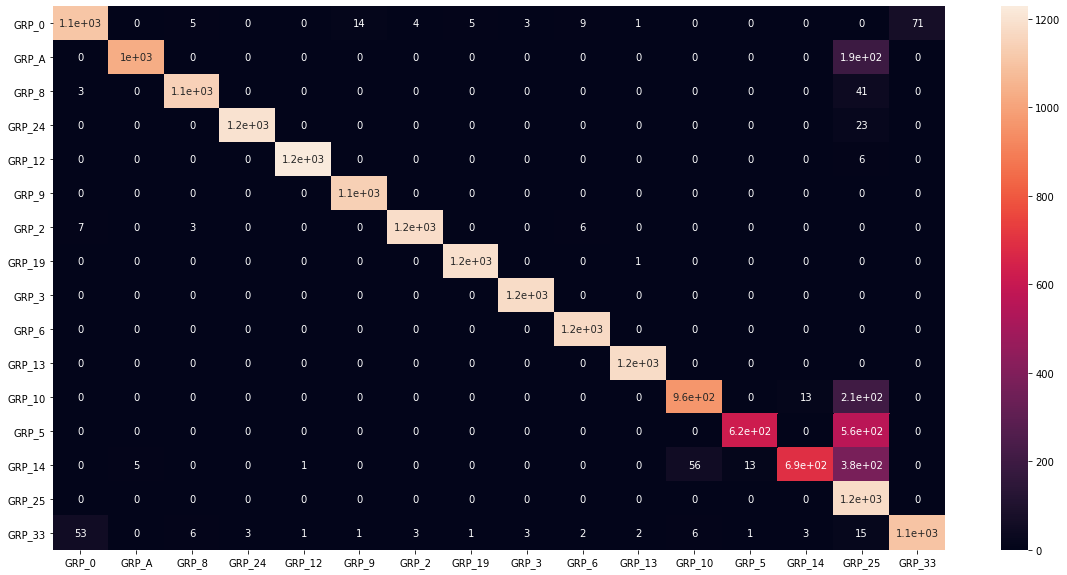

In [ ]:
run_classification(RandomForestClassifier(n_estimators=100), X_trainresampled, X_testresampled, y_trainresampled, y_testresampled)

#### GridSearch CV for SVM

In [152]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [153]:
def wordTokenizer(dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe

In [160]:
maxlen = 150
numWords = 9000
tokenizer,X = wordTokenizer(Ticket['Description'])
y = np.asarray(Ticket['Assignment group'])
X = pad_sequences(X, maxlen = maxlen)

print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of train Samples:", len(X_train2))
print("Number of test Samples:", len(X_test2))

Number of Samples: 8491
Number of Labels:  8491
Number of train Samples: 6792
Number of test Samples: 1699


In [171]:
# This portion seems to have an issue. Has been executing forever. Needs debugging.
#Cs = [0.01, 0.1, 1, 10]
#gammas = [0.001, 0.01, 0.1, 1]
#param_grid = {'C': Cs, 'gamma' : gammas}
#svc = svm.SVC(kernel='rbf')
#grid_search = GridSearchCV(svc, param_grid)
#grid_search.fit(X_train2,y_train2)

#classifier = svm.SVC(**grid_search.best_params_)
#classifier.fit(X_train2, y_train2)

KeyboardInterrupt: ignored